# Data Generation and Statistical Test


In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os 
import sys
sys.path.append('../')

import Util.data_check

## Data Preparation

In [26]:
data_path1 = '../Data/'
data_path2 = '../data/'

# Check which path exists
if os.path.exists(data_path1):
    data_path = data_path1
elif os.path.exists(data_path2):
    data_path = data_path2
else:
    raise FileNotFoundError("Neither data_path1 nor data_path2 exists")

In [27]:
# set random seed for reproducibility
np.random.seed(42)

# Daten laden
file_name = 'preprocessed_df_v2.csv'
file_path = os.path.join(data_path, file_name)

data = pd.read_csv(file_path)

In [28]:
data.head()

participant_id  test_id  test_duration  mental  physical  temporal  \
0               1        1      33.643950      10         5        15   
1               1        2      28.484322      50        30        25   
2               1        3      71.423823     100        10        75   
3               1        4      38.163442      60        15        45   
4               2        1      41.748047      20        10        20   

   performance  effort  frustration  mean  ...  fixationrate_rel  \
0           25      25           10  15.0  ...          0.000000   
1           50      15           25  32.5  ...         -0.120413   
2           80      90           20  62.5  ...         -0.099928   
3           50      20           25  35.8  ...         -0.007684   
4           10      20           15  15.8  ...          0.000000   

   fixationrate_rel_pct  mean_pupil_diameter_rel  mean_pupil_diameter_rel_pct  \
0              0.000000                 0.000000                     0.000000   
1            -40.687440                -0.919996                    -2.097788   
2            -33.765546                 0.848925                     1.935731   
3             -2.596309                 1.906622                     4.347507   
4              0.000000                 0.000000                     0.000000   

   median_pupil_diameter_rel  median_pupil_diameter_rel_pct  \
0                   0.000000                       0.000000   
1                  -0.872377                      -1.987465   
2                   0.897654                       2.045050   
3                   1.951494                       4.445927   
4                   0.000000                       0.000000   

   visual_acuity_logmar  gender  age  education  
0                 -0.04       0   28         18  
1                 -0.04       0   28         18  
2                 -0.04       0   28         18  
3                 -0.04       0   28         18  
4                 -0.10       0   28         18  

[5 rows x 26 columns]

In [29]:
print(data.columns.to_list())

['participant_id', 'test_id', 'test_duration', 'mental', 'physical', 'temporal', 'performance', 'effort', 'frustration', 'mean', 'mean_pupil_diameter', 'median_pupil_diameter', 'blinkrate', 'fixationrate', 'blinkrate_rel', 'blinkrate_rel_pct', 'fixationrate_rel', 'fixationrate_rel_pct', 'mean_pupil_diameter_rel', 'mean_pupil_diameter_rel_pct', 'median_pupil_diameter_rel', 'median_pupil_diameter_rel_pct', 'visual_acuity_logmar', 'gender', 'age', 'education']


In [30]:
# Entfernen der berechneten relativen Features 
columns_to_drop = ['blinkrate_rel', 'blinkrate_rel_pct', 'fixationrate_rel', 'fixationrate_rel_pct', 'mean_pupil_diameter_rel', 'mean_pupil_diameter_rel_pct', 'median_pupil_diameter_rel', 'median_pupil_diameter_rel_pct']
data = data.drop(columns_to_drop, axis=1)
print(data.columns.to_list())

['participant_id', 'test_id', 'test_duration', 'mental', 'physical', 'temporal', 'performance', 'effort', 'frustration', 'mean', 'mean_pupil_diameter', 'median_pupil_diameter', 'blinkrate', 'fixationrate', 'visual_acuity_logmar', 'gender', 'age', 'education']


In [31]:
discrete_columns = ['gender', 'education']  
continuous_columns = [col for col in data.columns if col not in discrete_columns]

In [32]:
def scale_data(df_to_scale):
    """
    Scale continuous data using MinMaxScaler
    """ 
        
    # Daten skalieren
    scaler = MinMaxScaler()
    data_continuous_scaled = scaler.fit_transform(df_to_scale[continuous_columns])
    
    # Generate synthetic continuous data
    means = np.mean(data_continuous_scaled, axis=0)
    stds = np.std(data_continuous_scaled, axis=0)
    num_additional_points = 1000
    synthetic_data_continuous_scaled = np.random.normal(loc=means, scale=stds, size=(num_additional_points, data_continuous_scaled.shape[1]))
    
    # Inverse transform to get the original scale
    synthetic_data_continuous = scaler.inverse_transform(synthetic_data_continuous_scaled)
    synthetic_data_continuous_df = pd.DataFrame(synthetic_data_continuous, columns=continuous_columns)
    
    # Calculate distributions for discrete columns
    discrete_distributions = {col: df_to_scale[col].value_counts(normalize=True) for col in discrete_columns}
    
    # Generate synthetic discrete data based on distributions
    synthetic_data_discrete = {}
    for col in discrete_columns:
        values = discrete_distributions[col].index.tolist()
        probabilities = discrete_distributions[col].values.tolist()
        synthetic_data_discrete[col] = np.random.choice(values, size=num_additional_points, p=probabilities)
    
    # Convert synthetic discrete data to DataFrame
    synthetic_data_discrete_df = pd.DataFrame(synthetic_data_discrete)
    
    # Combine synthetic continuous and discrete data
    synthetic_data_combined_df = pd.concat([synthetic_data_continuous_df, synthetic_data_discrete_df], axis=1)
    
    return synthetic_data_combined_df

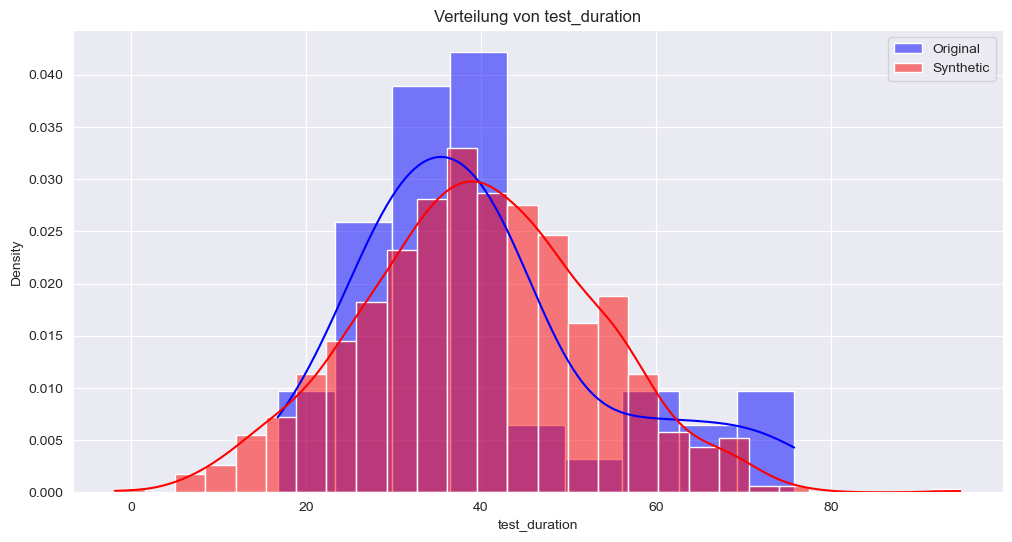

Normalitätstest für test_duration:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für test_duration:
Statistik = 0.39977935892002603, p-Wert = 0.5272032270909883
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



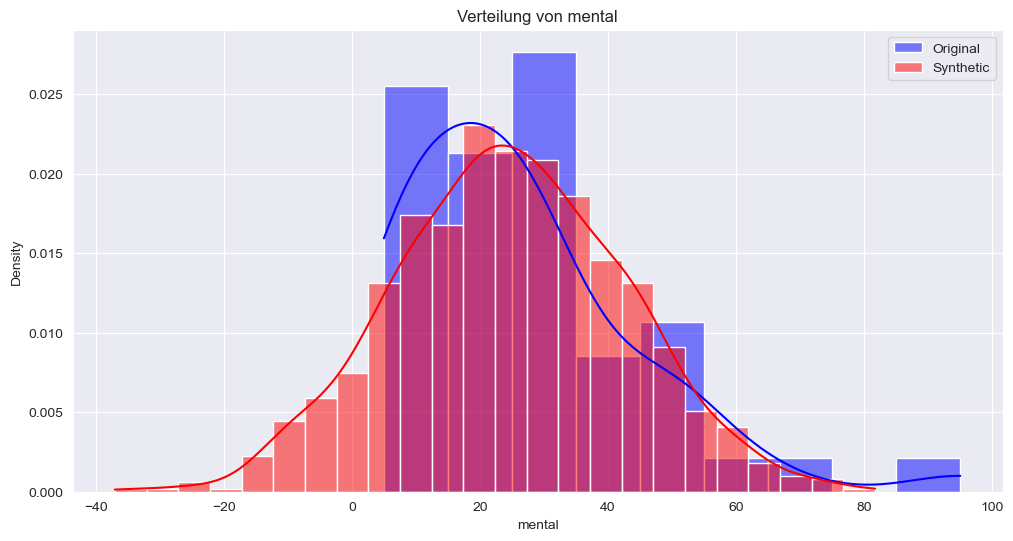

Normalitätstest für mental:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mental:
Statistik = 0.11232134355736344, p-Wert = 0.7375166398651318
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



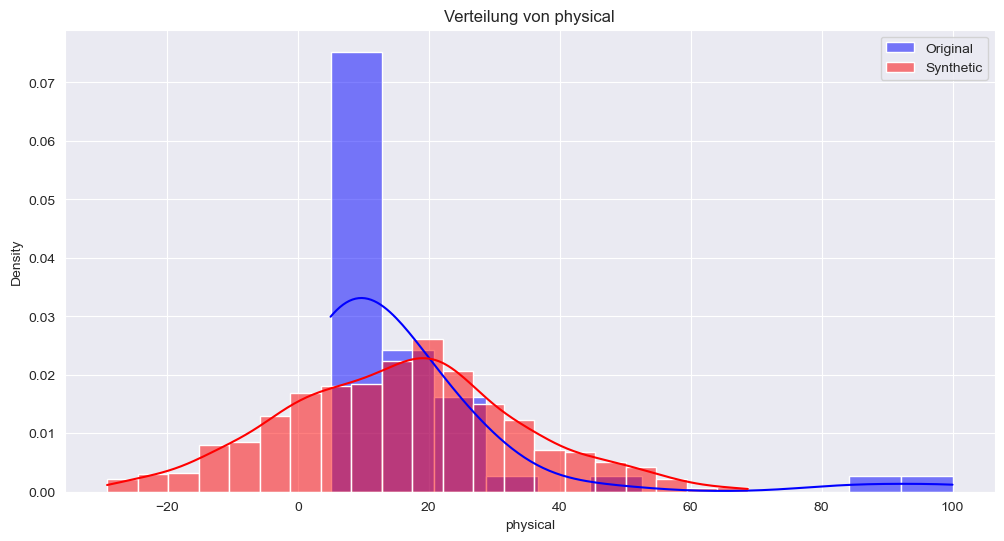

Normalitätstest für physical:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für physical:
Statistik = 0.8455711880904939, p-Wert = 0.35780825393600635
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



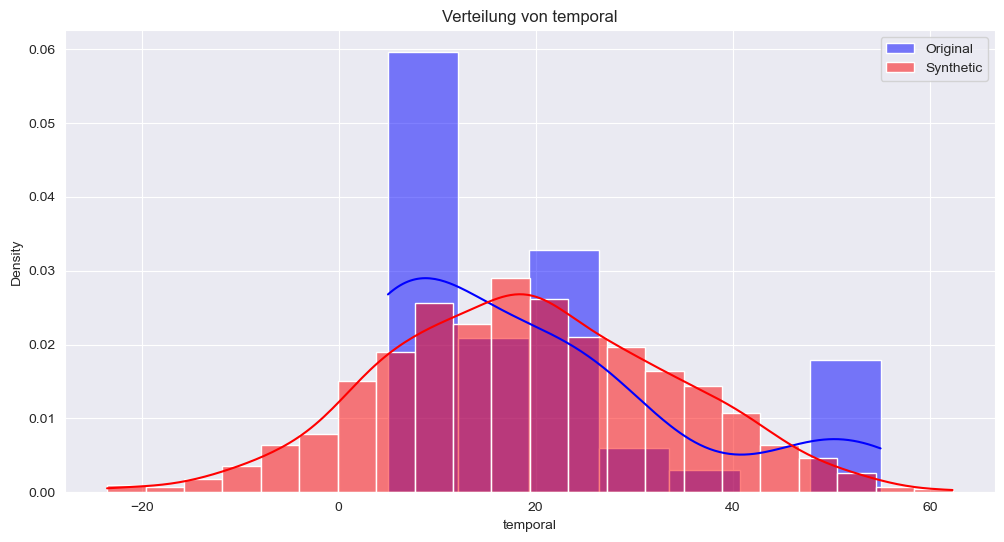

Normalitätstest für temporal:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für temporal:
Statistik = 0.7911040719681098, p-Wert = 0.37376648706688487
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



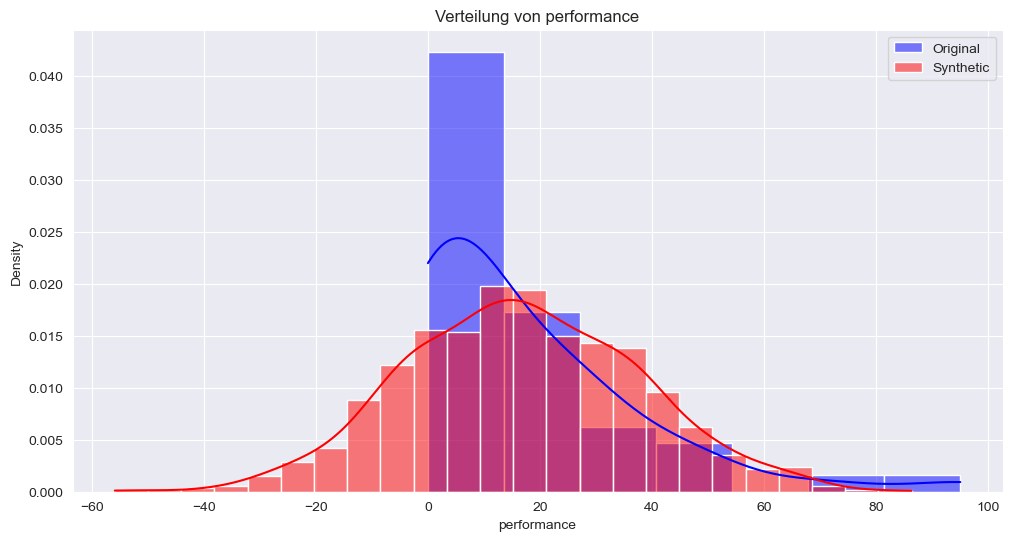

Normalitätstest für performance:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für performance:
Statistik = 0.46598061054200185, p-Wert = 0.49484211043830784
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



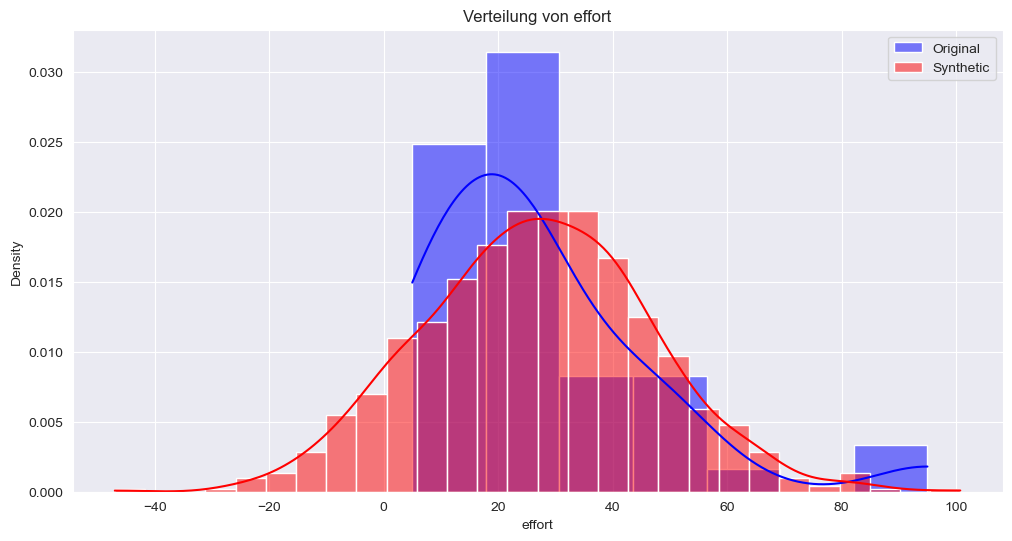

Normalitätstest für effort:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für effort:
Statistik = 0.5621319978707806, p-Wert = 0.4534025014812455
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



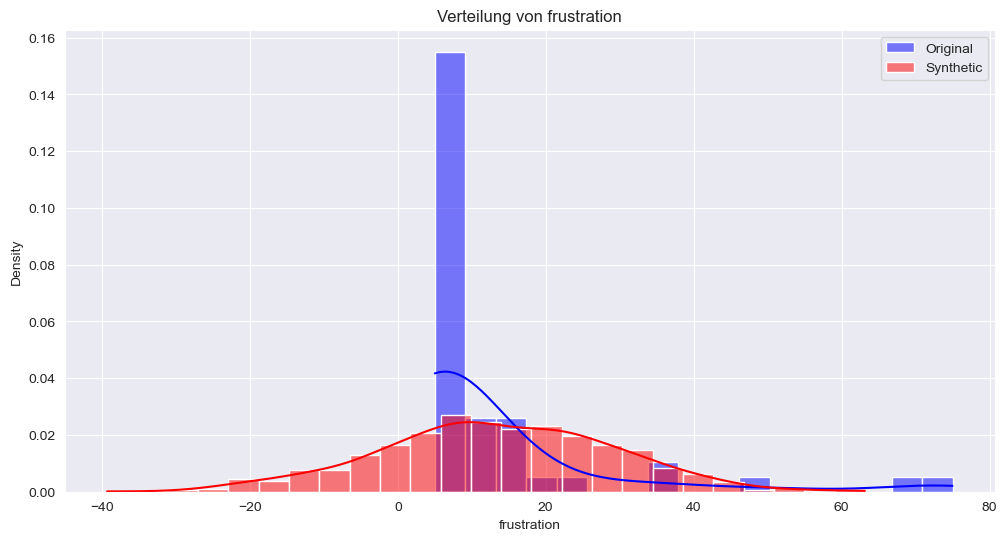

Normalitätstest für frustration:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für frustration:
Statistik = 3.178541508538772, p-Wert = 0.07461130009059913
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



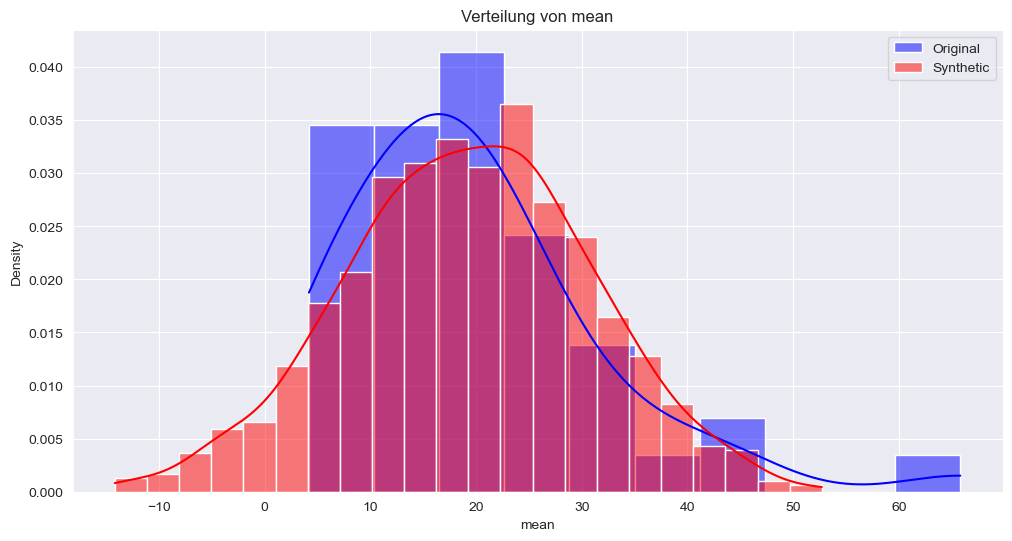

Normalitätstest für mean:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mean:
Statistik = 0.4303008001141899, p-Wert = 0.5118413871257854
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



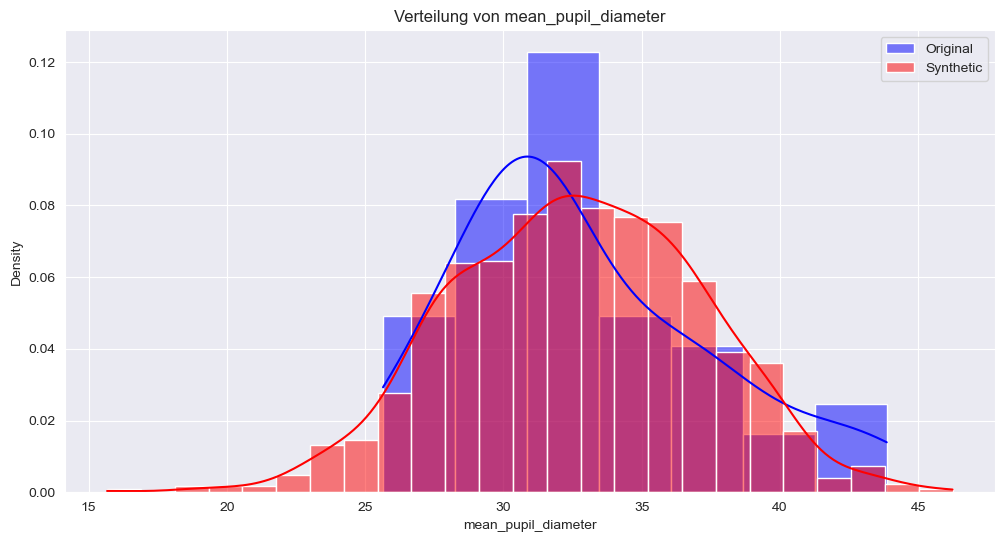

Normalitätstest für mean_pupil_diameter:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mean_pupil_diameter:
Statistik = 0.09761791507990064, p-Wert = 0.7547071748313589
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



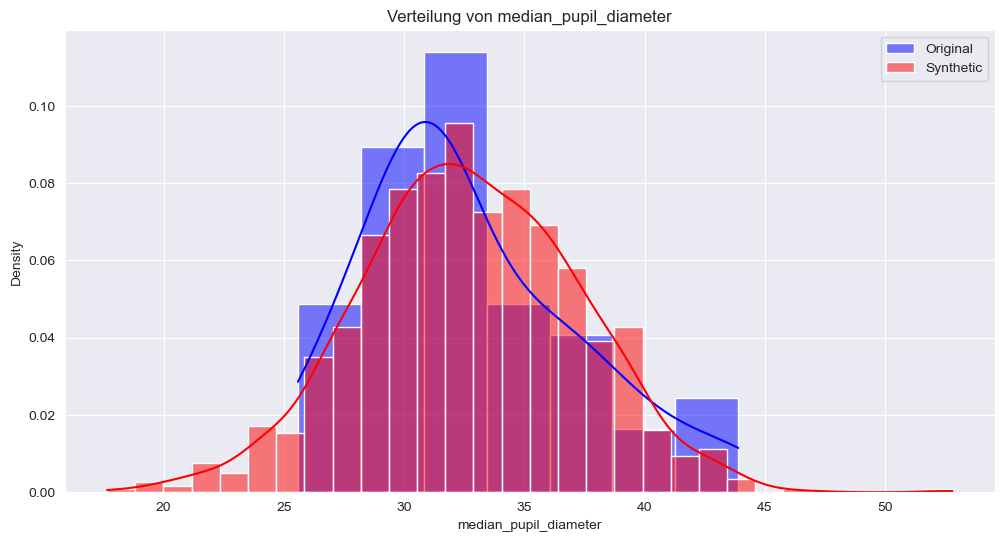

Normalitätstest für median_pupil_diameter:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für median_pupil_diameter:
Statistik = 0.25396483809870185, p-Wert = 0.6142970462971001
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



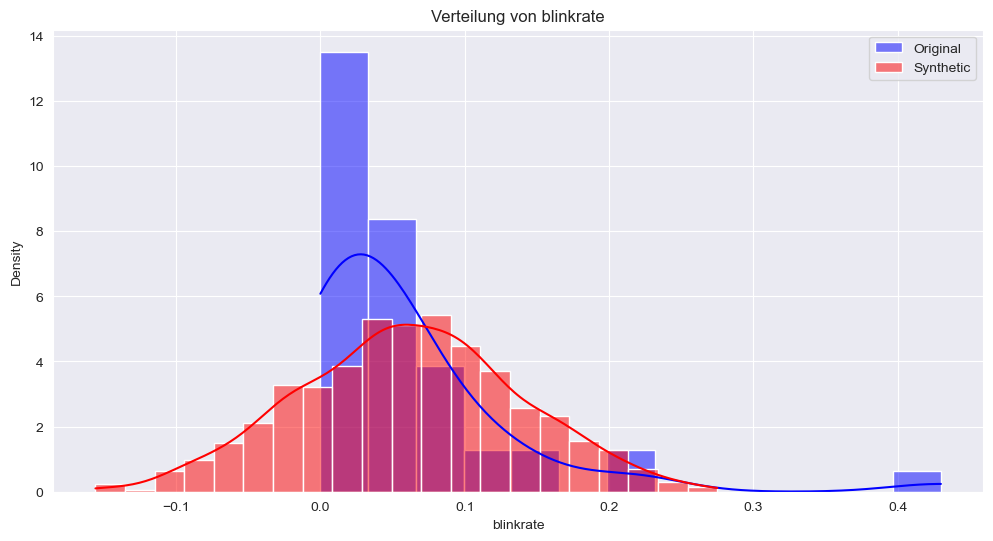

Normalitätstest für blinkrate:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für blinkrate:
Statistik = 1.9113885263578327, p-Wert = 0.16680910045910738
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



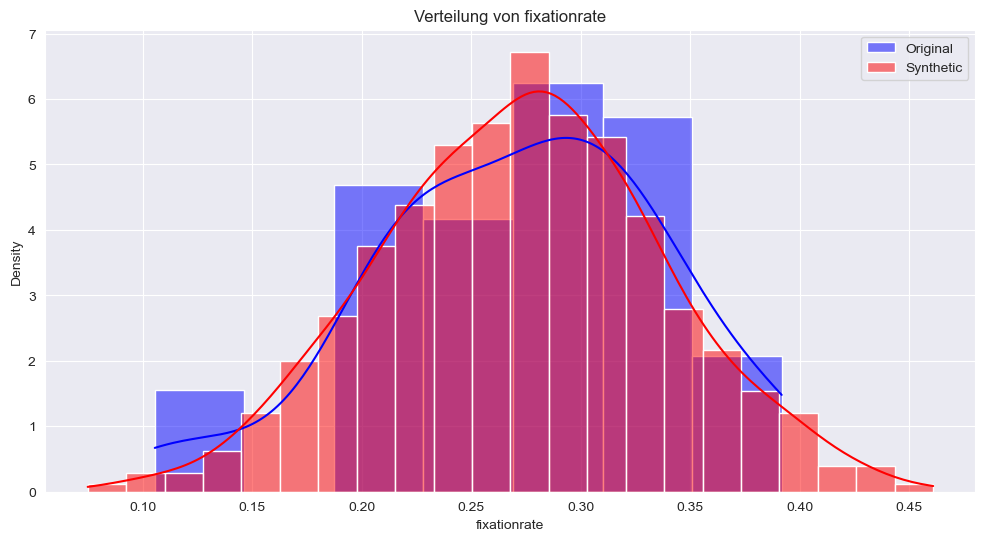

Normalitätstest für fixationrate:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für fixationrate:
Statistik = -0.11146226488581806, p-Wert = 0.9116943637920198
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



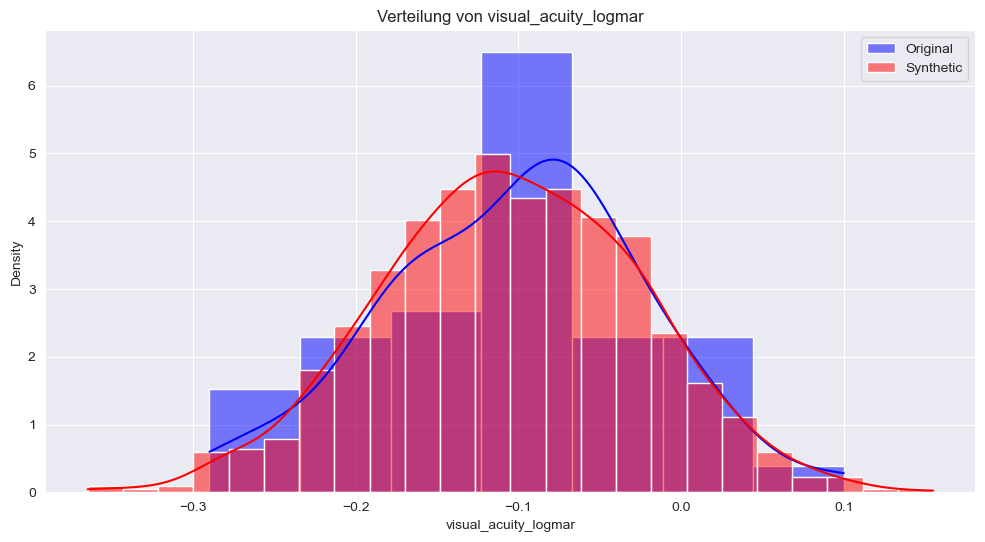

Normalitätstest für visual_acuity_logmar:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für visual_acuity_logmar:
Statistik = 0.1831114210470891, p-Wert = 0.8554440682950941
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



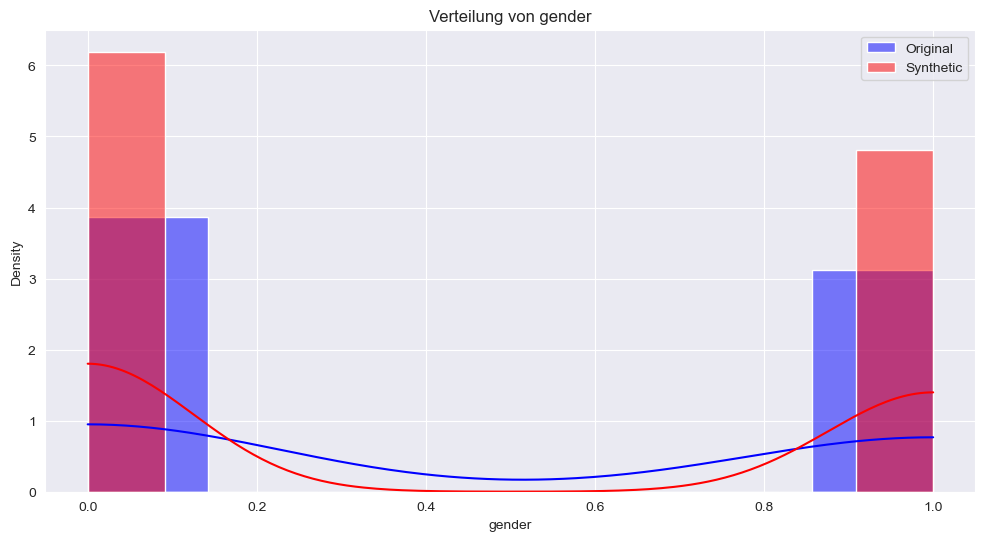

Normalitätstest für gender:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für gender:
Statistik = 0.017532946378073743, p-Wert = 0.8946583978368731
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



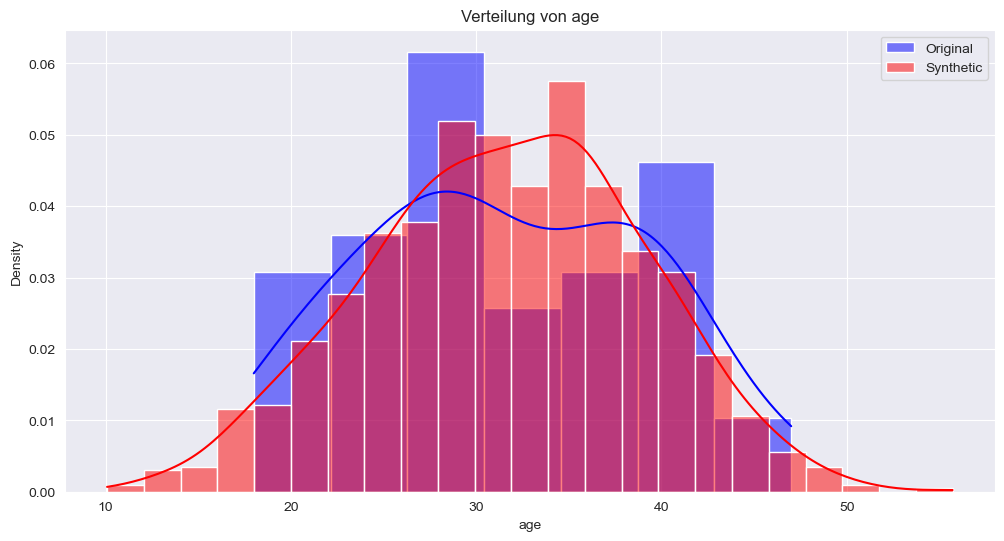

Normalitätstest für age:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für age:
Statistik = -0.1266881670952043, p-Wert = 0.8996945457928157
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



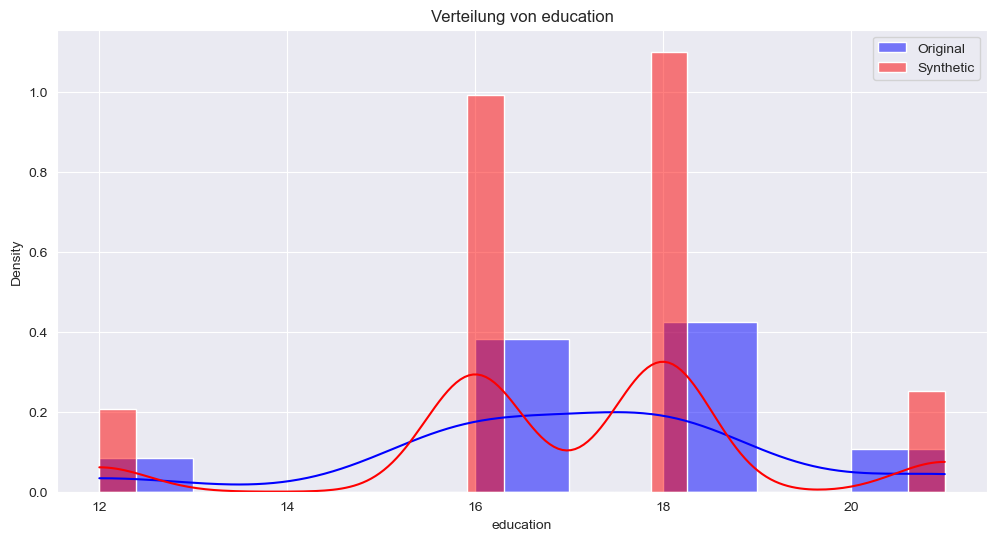

Normalitätstest für education:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für education:
Statistik = 0.001975552025275794, p-Wert = 0.9645479526522379
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



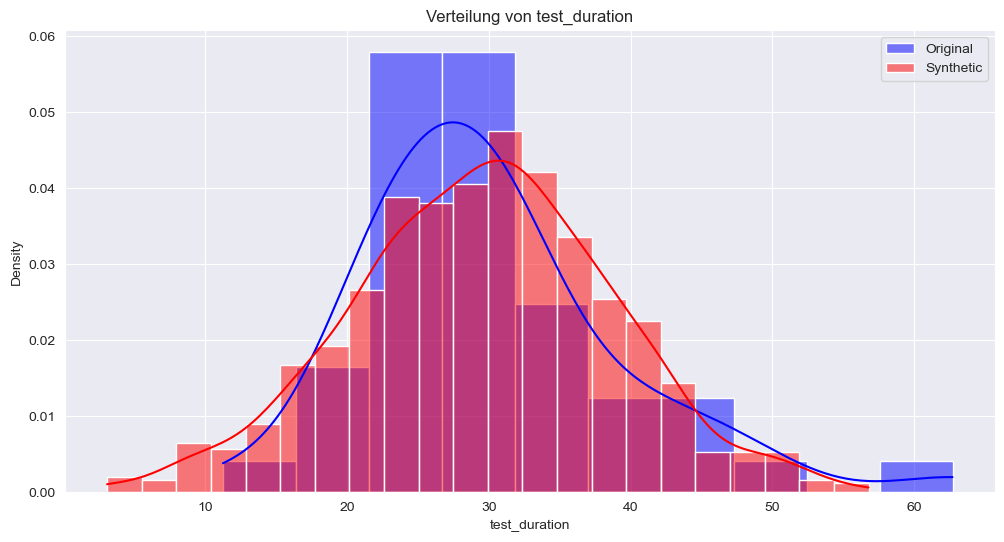

Normalitätstest für test_duration:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für test_duration:
Statistik = 0.1045212771416854, p-Wert = 0.746469942883555
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



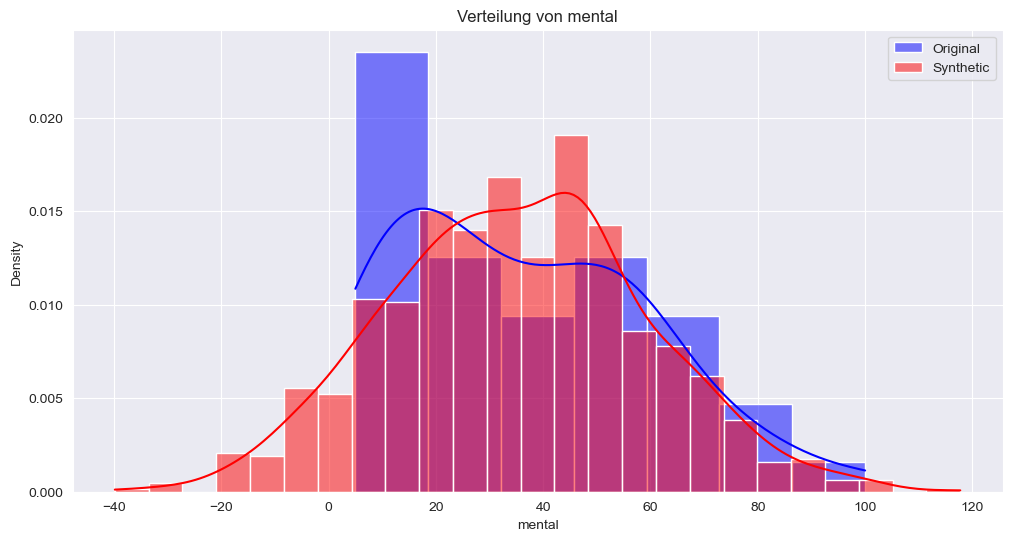

Normalitätstest für mental:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mental:
Statistik = 0.000370554177130573, p-Wert = 0.9846418432016588
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



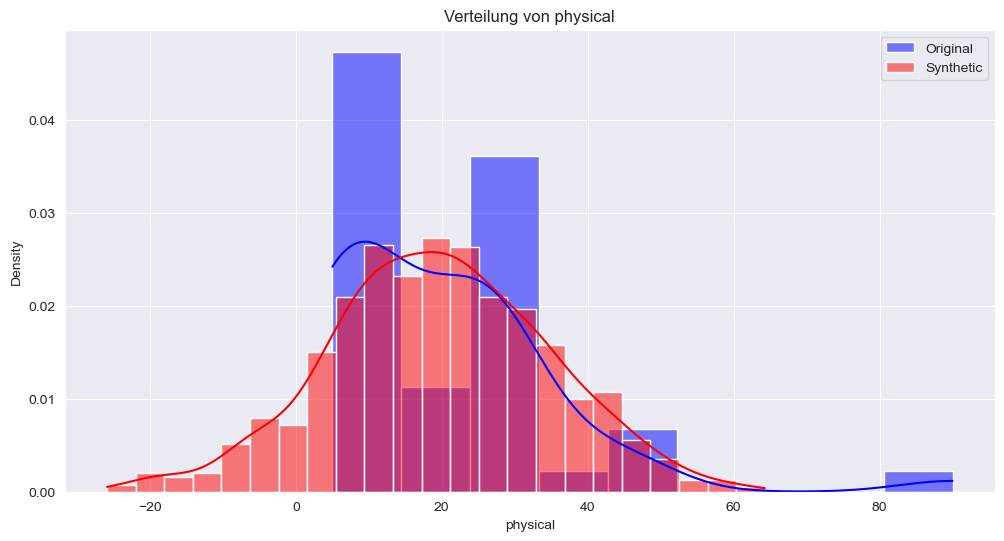

Normalitätstest für physical:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für physical:
Statistik = 0.5243047837669295, p-Wert = 0.46901113809545614
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



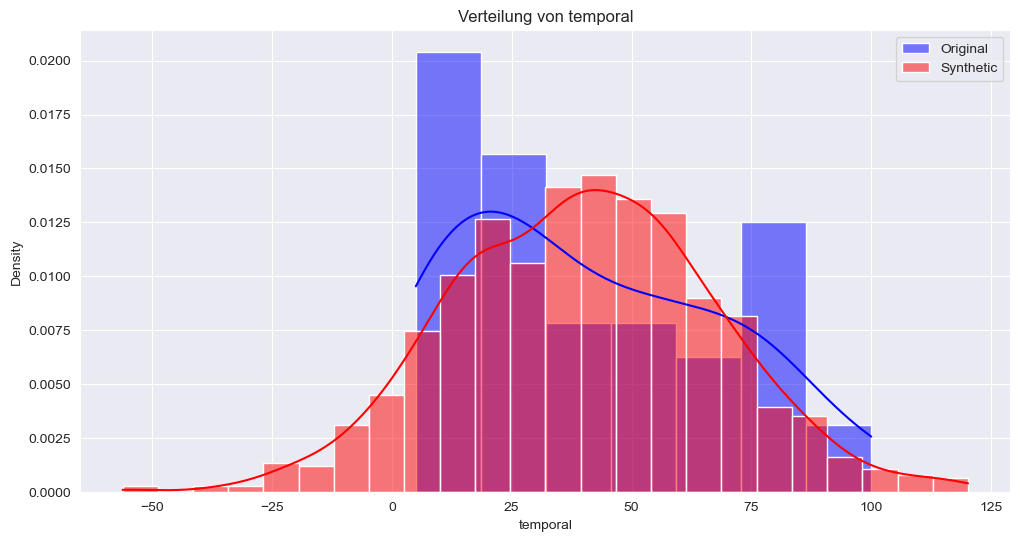

Normalitätstest für temporal:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für temporal:
Statistik = 0.015966225911226695, p-Wert = 0.899448917140149
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



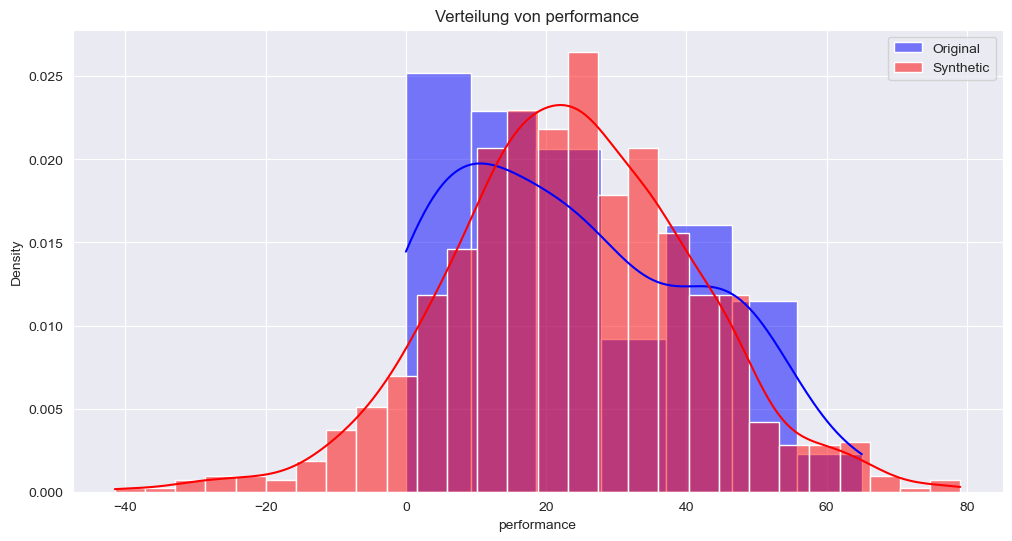

Normalitätstest für performance:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für performance:
Statistik = 0.2534678403412661, p-Wert = 0.6146437803816456
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



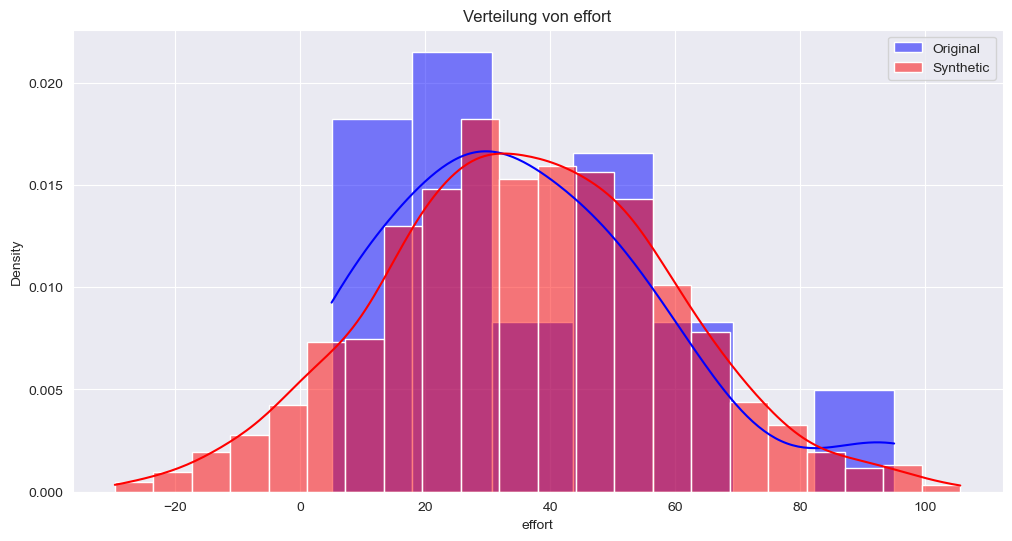

Normalitätstest für effort:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für effort:
Statistik = 0.24265181900935695, p-Wert = 0.6222973577419719
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



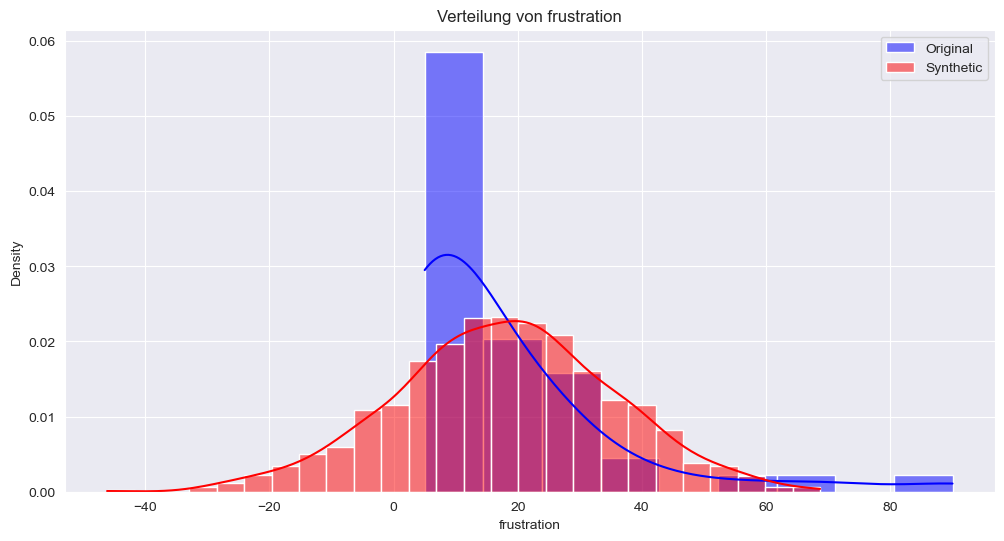

Normalitätstest für frustration:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für frustration:
Statistik = 2.3021450613411463, p-Wert = 0.12919546804609766
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



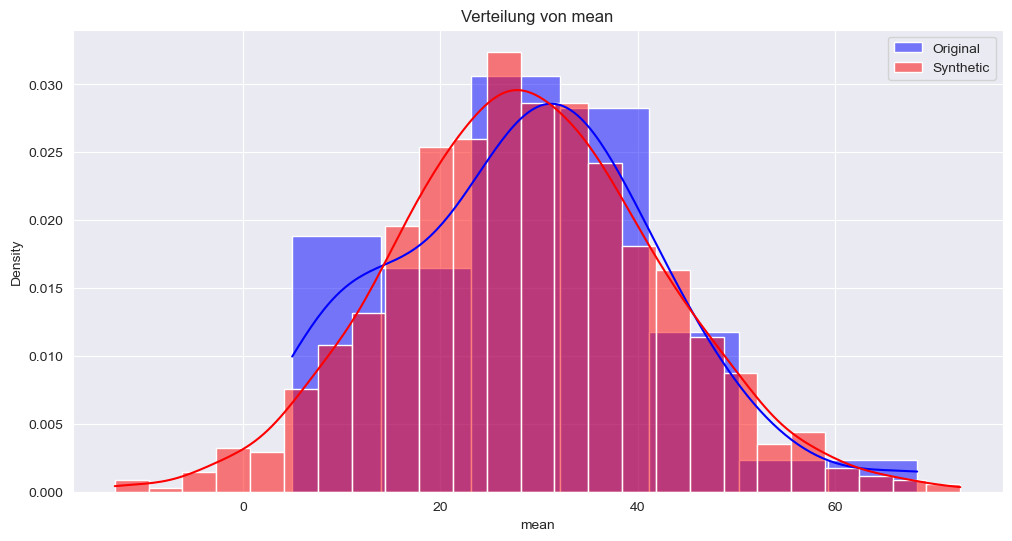

Normalitätstest für mean:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für mean:
Statistik = -0.0014958795407779407, p-Wert = 0.9988123671137719
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



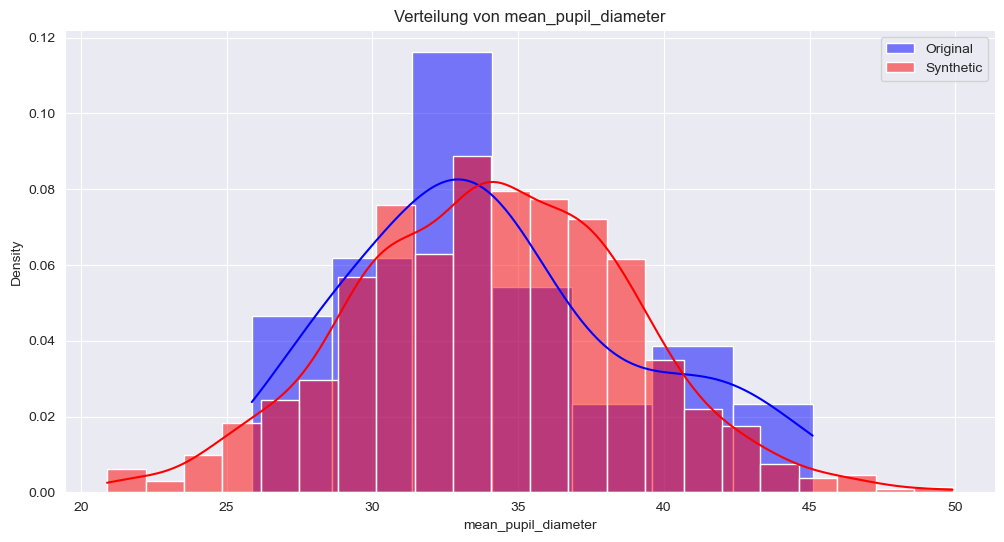

Normalitätstest für mean_pupil_diameter:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für mean_pupil_diameter:
Statistik = 0.01595984988632791, p-Wert = 0.9873297679254914
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



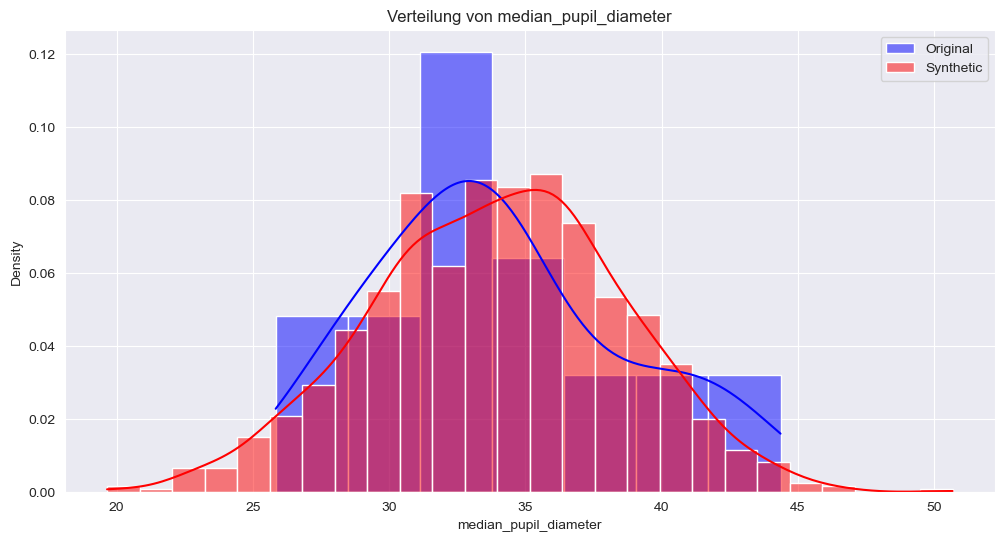

Normalitätstest für median_pupil_diameter:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für median_pupil_diameter:
Statistik = 0.005457912548034464, p-Wert = 0.9956668278730849
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



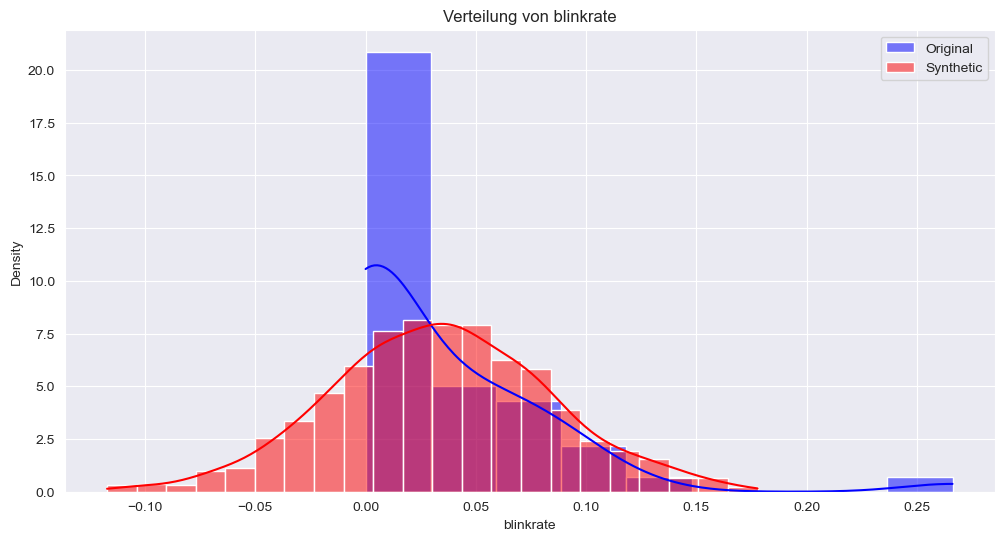

Normalitätstest für blinkrate:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für blinkrate:
Statistik = 1.2709258338502305, p-Wert = 0.2595930659467043
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



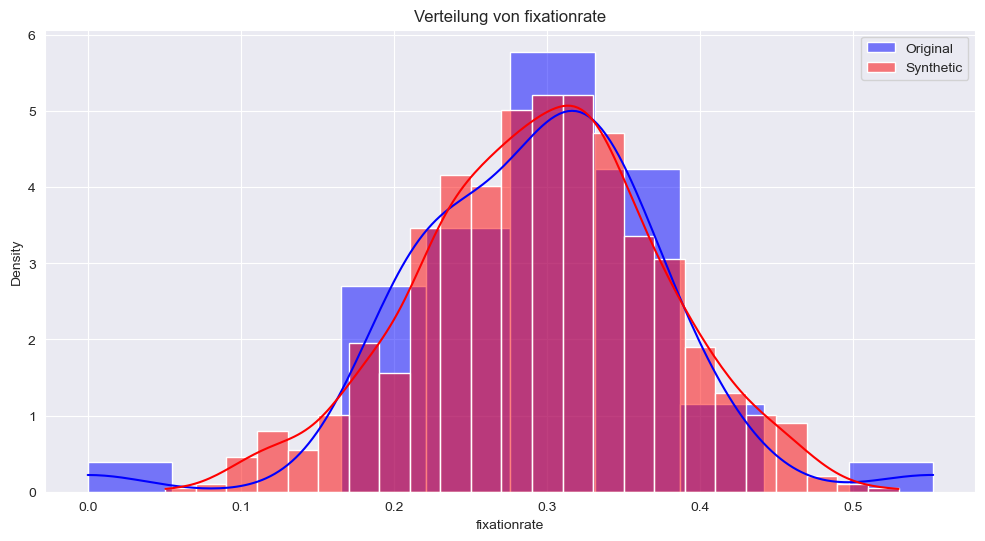

Normalitätstest für fixationrate:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für fixationrate:
Statistik = 0.03481013498784359, p-Wert = 0.8519940706041047
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



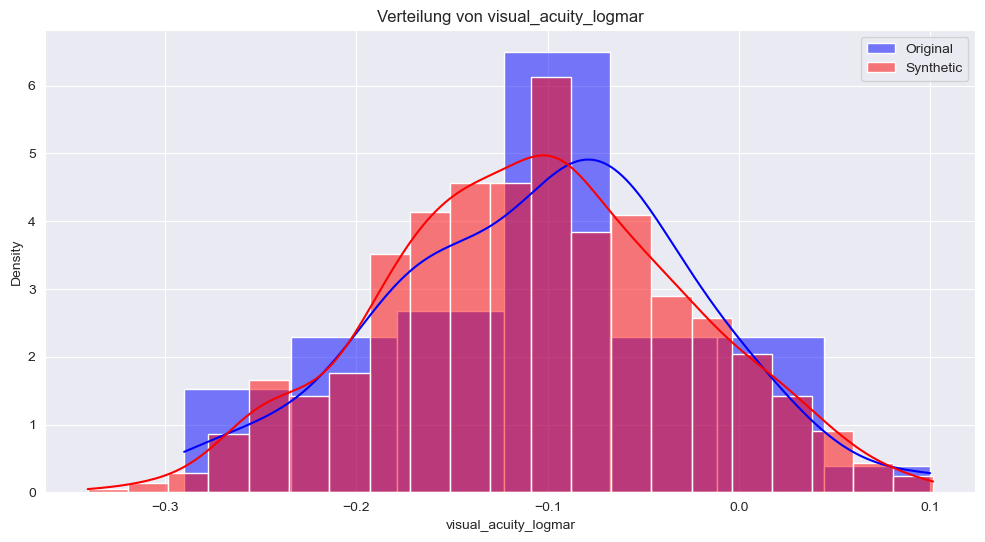

Normalitätstest für visual_acuity_logmar:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für visual_acuity_logmar:
Statistik = 0.3301425661557777, p-Wert = 0.7426615114838822
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



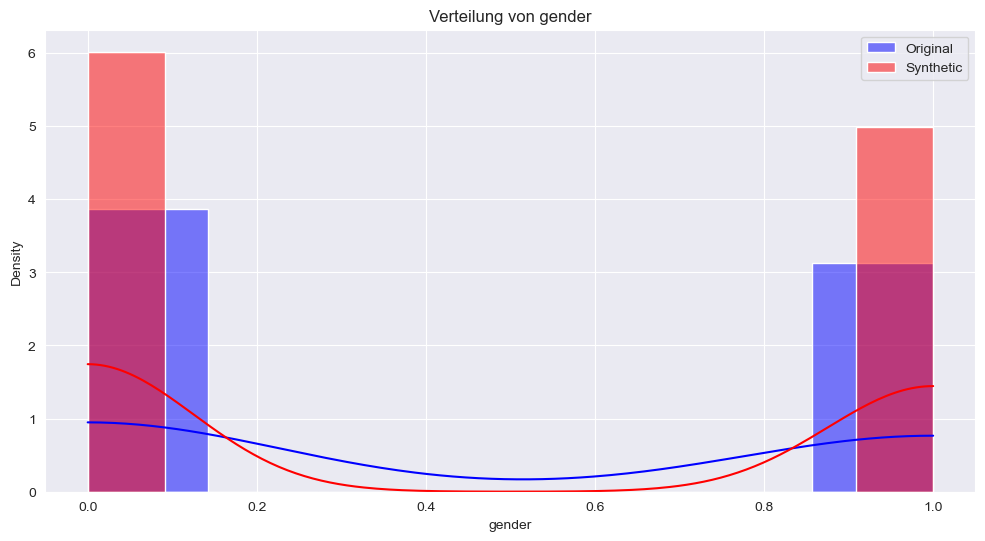

Normalitätstest für gender:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für gender:
Statistik = 0.006938839481202215, p-Wert = 0.9336132414042485
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



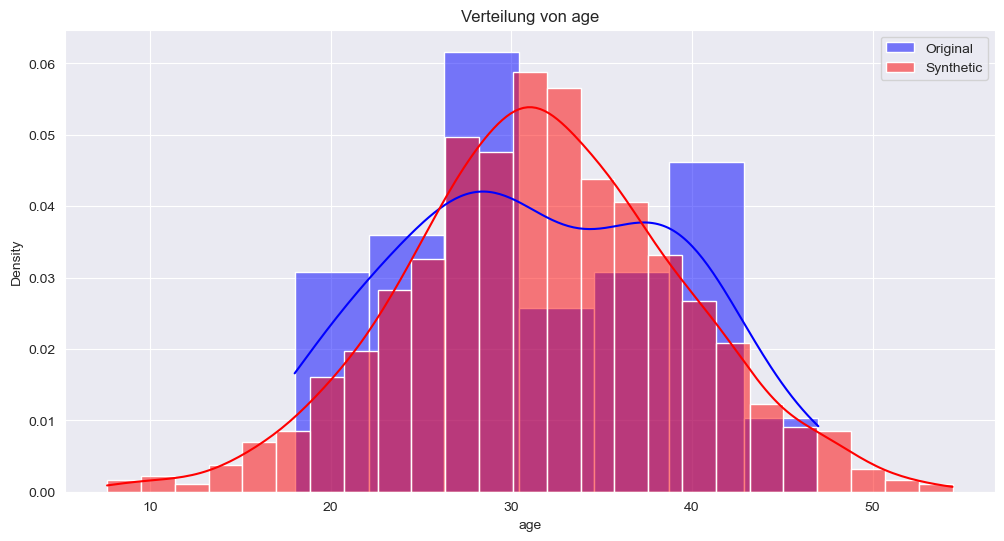

Normalitätstest für age:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für age:
Statistik = -0.17742257680063497, p-Wert = 0.859888786281471
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



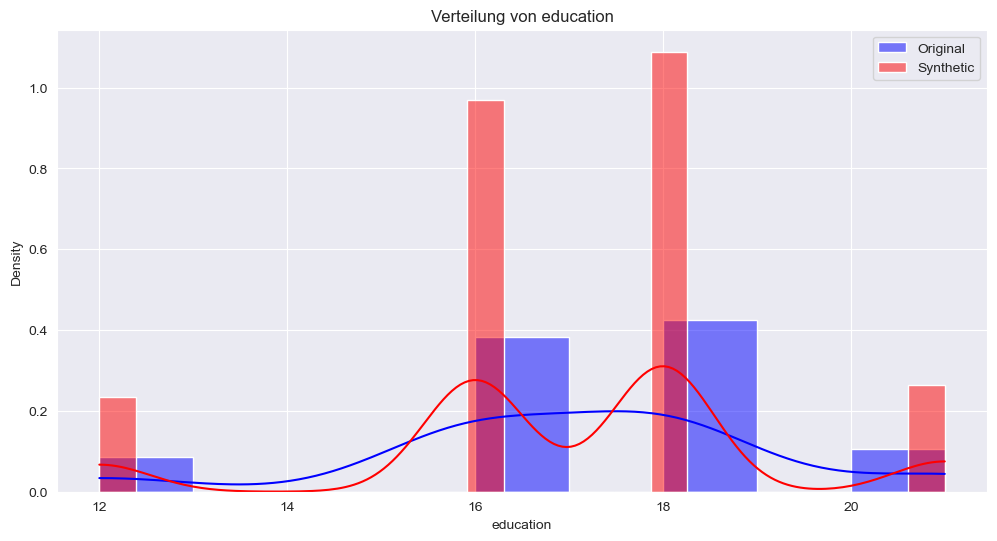

Normalitätstest für education:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für education:
Statistik = 0.008465325875913431, p-Wert = 0.9266923146648313
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



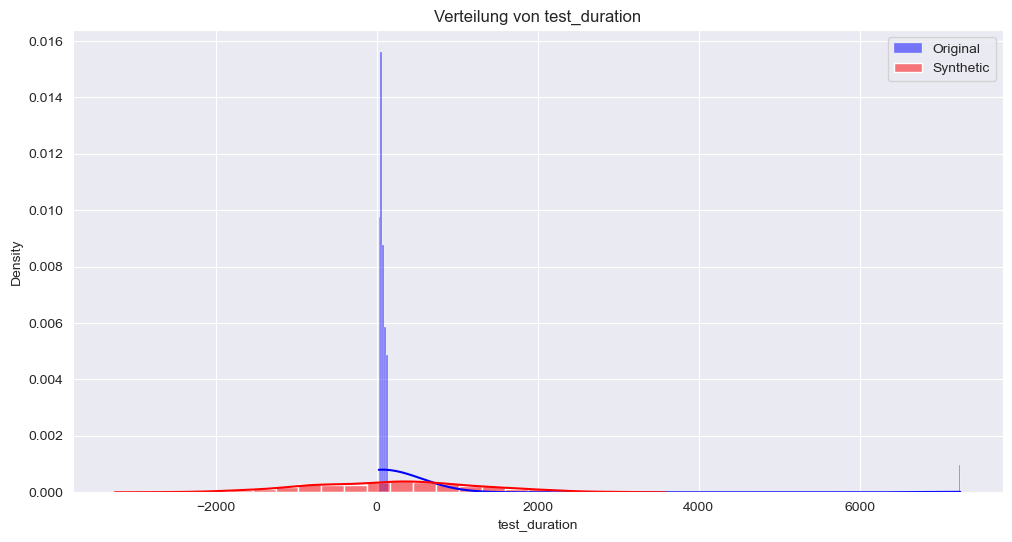

Normalitätstest für test_duration:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für test_duration:
Statistik = 1.547117110572999, p-Wert = 0.21356153853546256
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



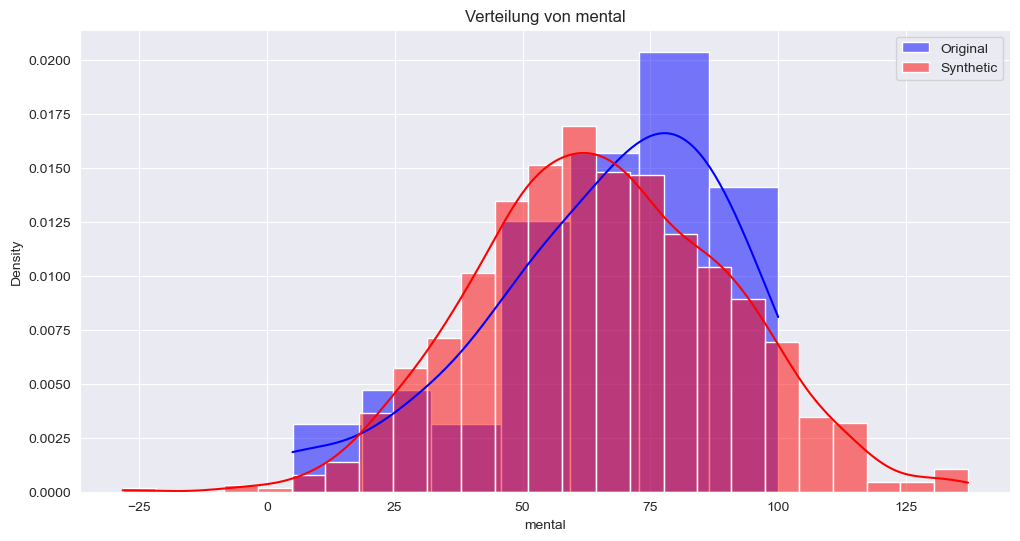

Normalitätstest für mental:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mental:
Statistik = 0.6859718915967259, p-Wert = 0.4075378784062925
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



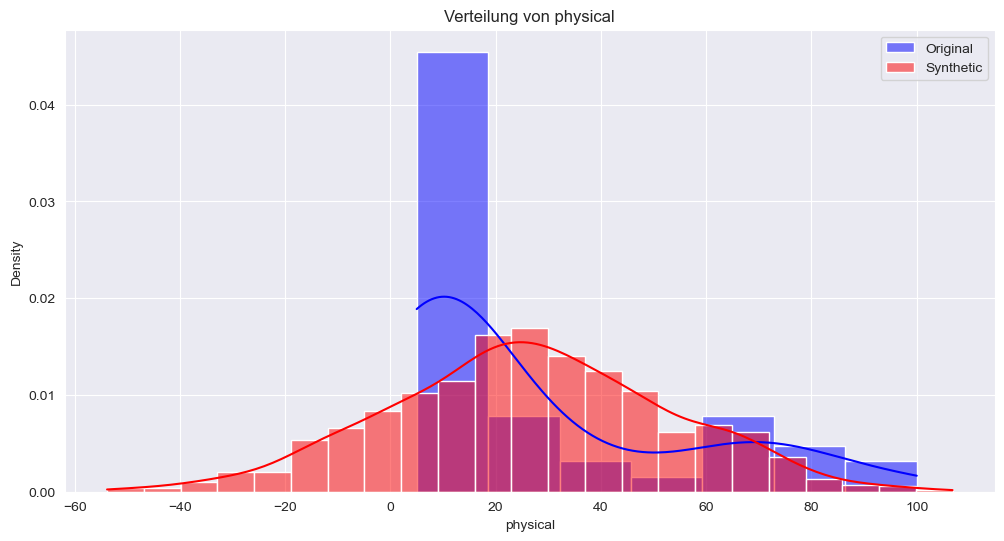

Normalitätstest für physical:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für physical:
Statistik = 1.1167522212776115, p-Wert = 0.2906188610072609
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



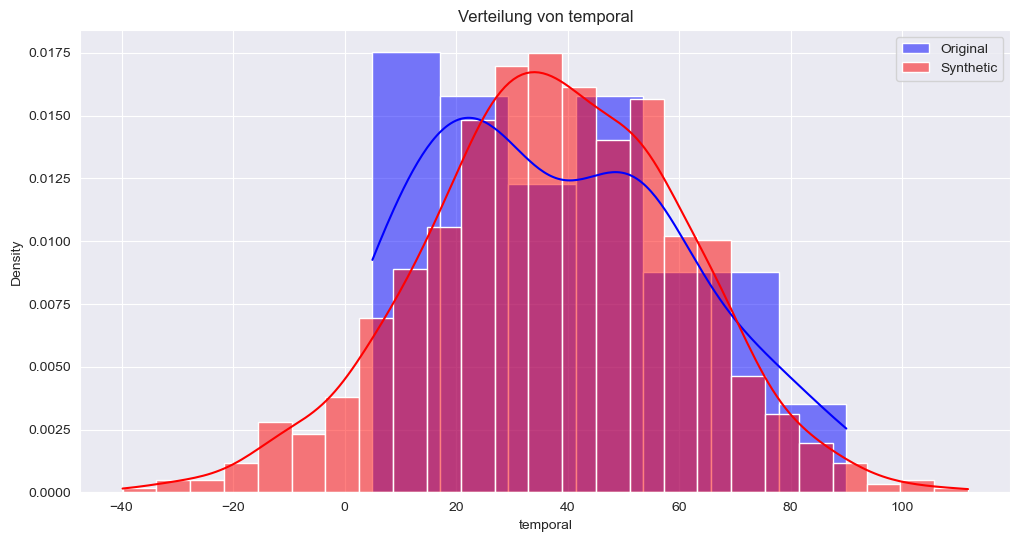

Normalitätstest für temporal:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für temporal:
Statistik = 0.09547093852428619, p-Wert = 0.7573339117171547
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



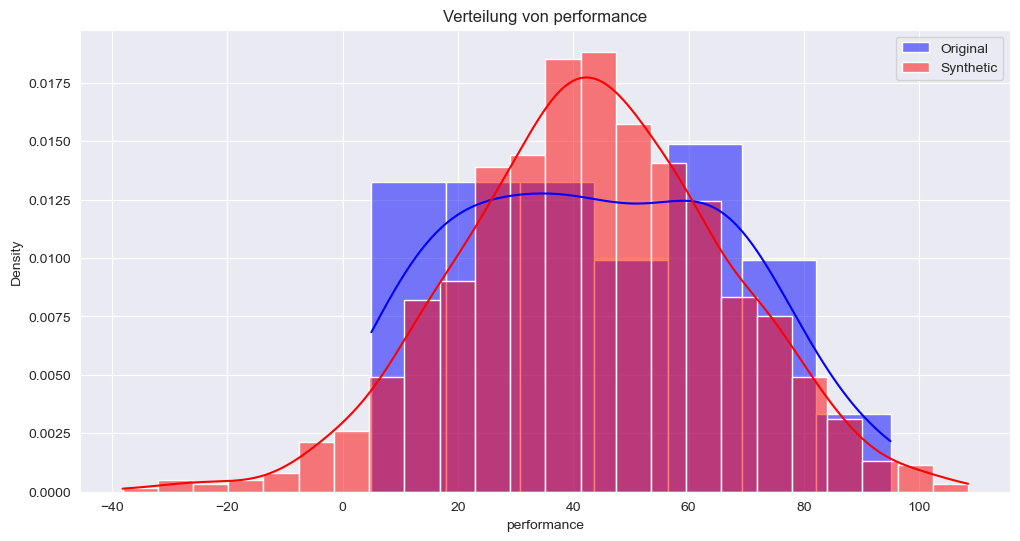

Normalitätstest für performance:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für performance:
Statistik = 0.09528258190406581, p-Wert = 0.9244704429924291
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



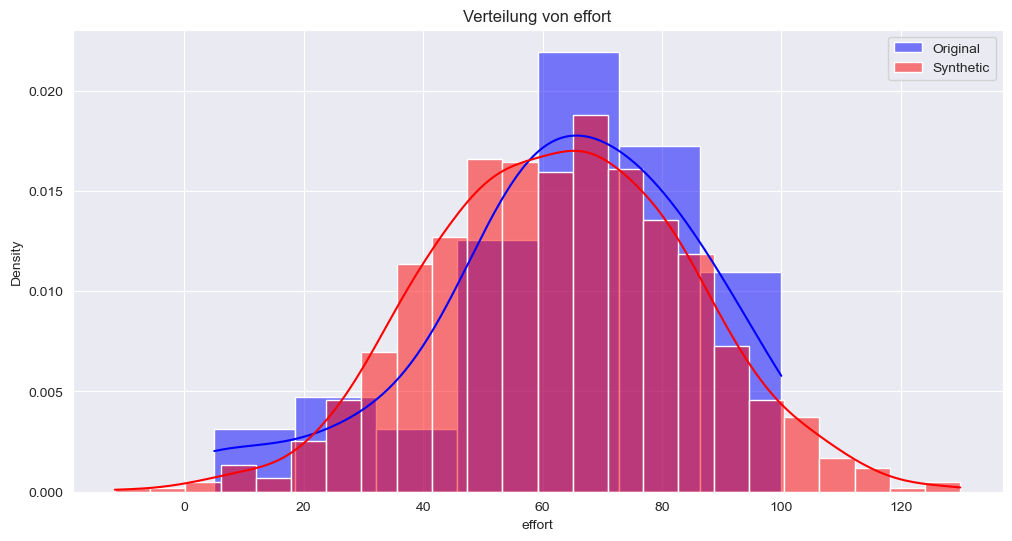

Normalitätstest für effort:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für effort:
Statistik = 0.5777818068857585, p-Wert = 0.44718309761624064
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



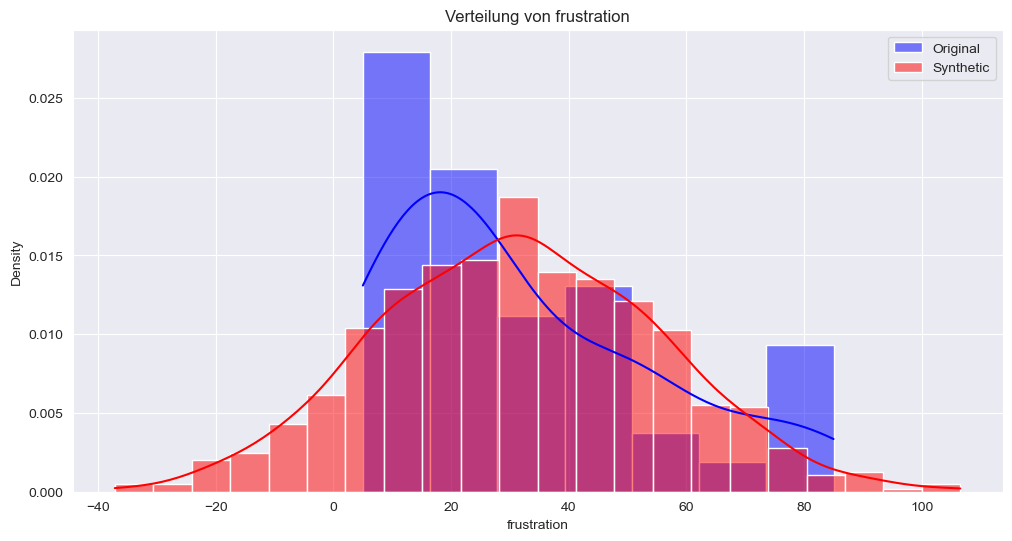

Normalitätstest für frustration:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für frustration:
Statistik = 0.33521120833743767, p-Wert = 0.5626065328845841
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



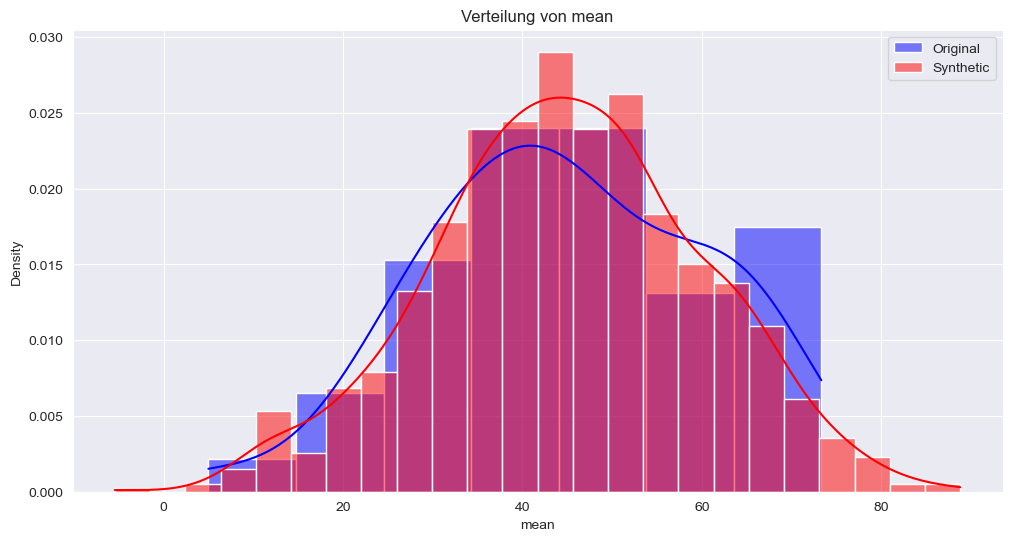

Normalitätstest für mean:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für mean:
Statistik = -0.010257546010744209, p-Wert = 0.991856497784815
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



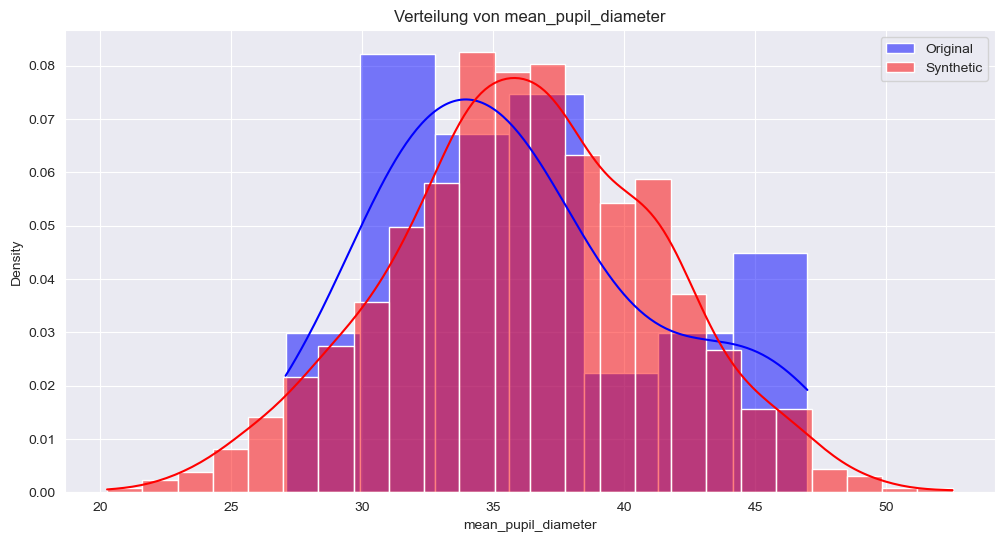

Normalitätstest für mean_pupil_diameter:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mean_pupil_diameter:
Statistik = 0.679446162395751, p-Wert = 0.40977750134243895
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



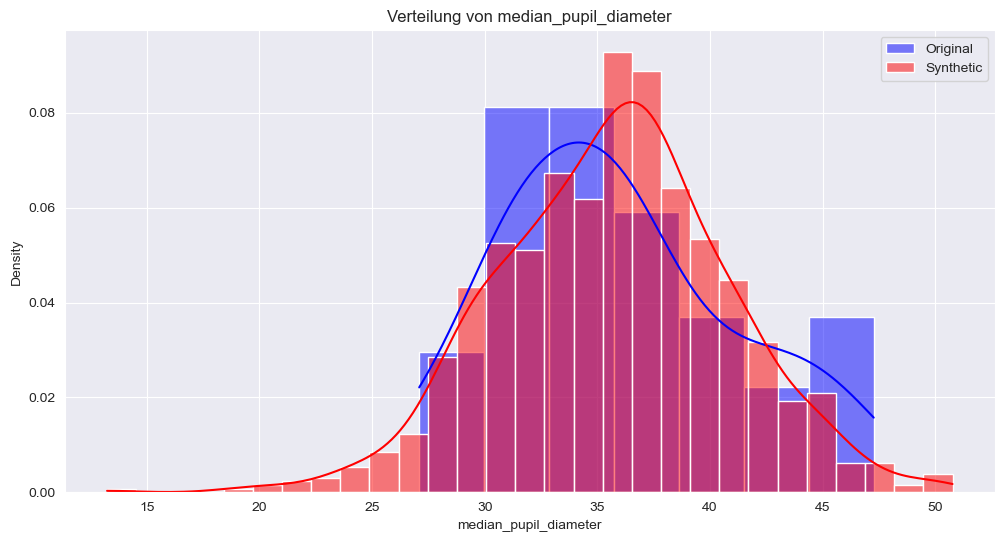

Normalitätstest für median_pupil_diameter:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für median_pupil_diameter:
Statistik = 0.23152323315214884, p-Wert = 0.8178494610395176
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



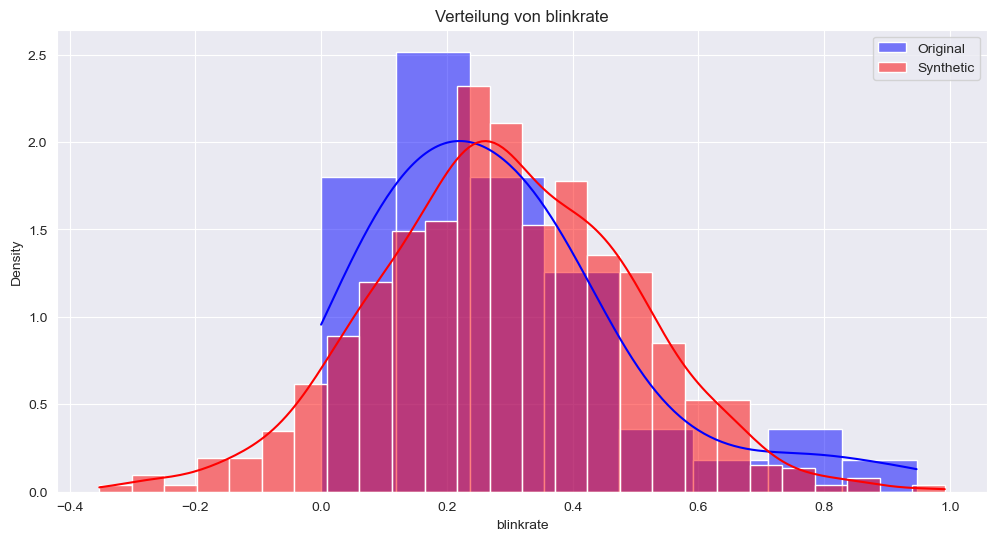

Normalitätstest für blinkrate:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für blinkrate:
Statistik = 1.033847663887597, p-Wert = 0.30925667222555375
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



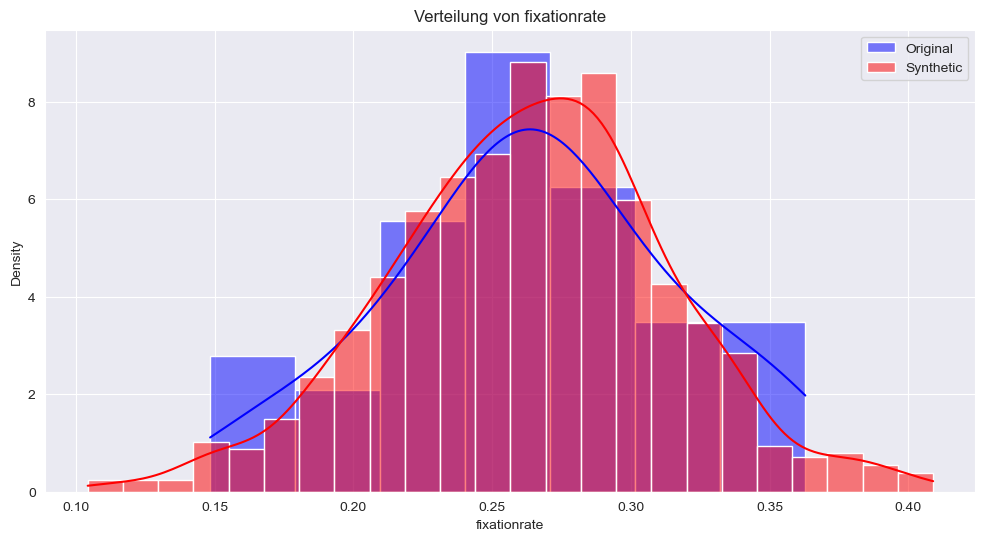

Normalitätstest für fixationrate:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für fixationrate:
Statistik = 0.1347364112151544, p-Wert = 0.8933598947744812
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



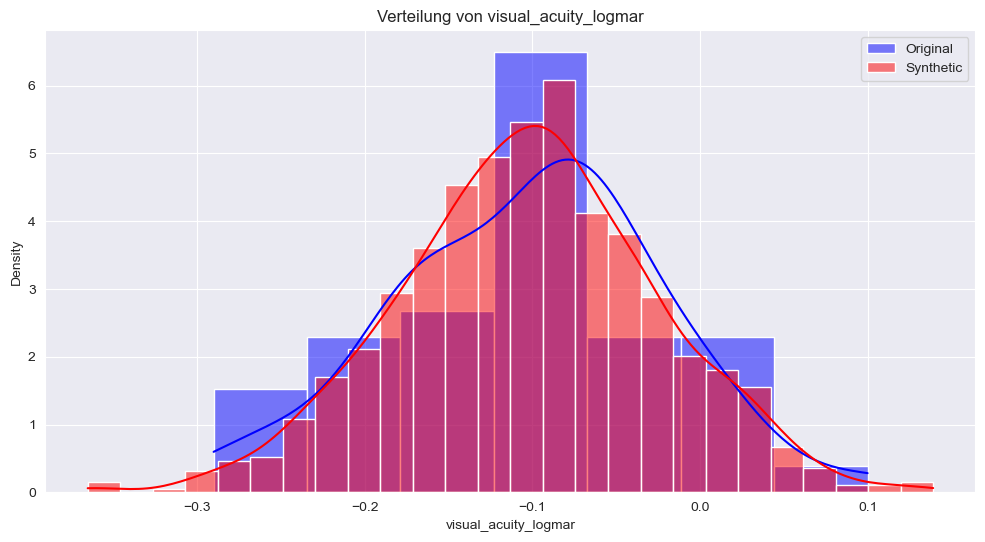

Normalitätstest für visual_acuity_logmar:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für visual_acuity_logmar:
Statistik = -0.0270747474295493, p-Wert = 0.9785075426596104
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



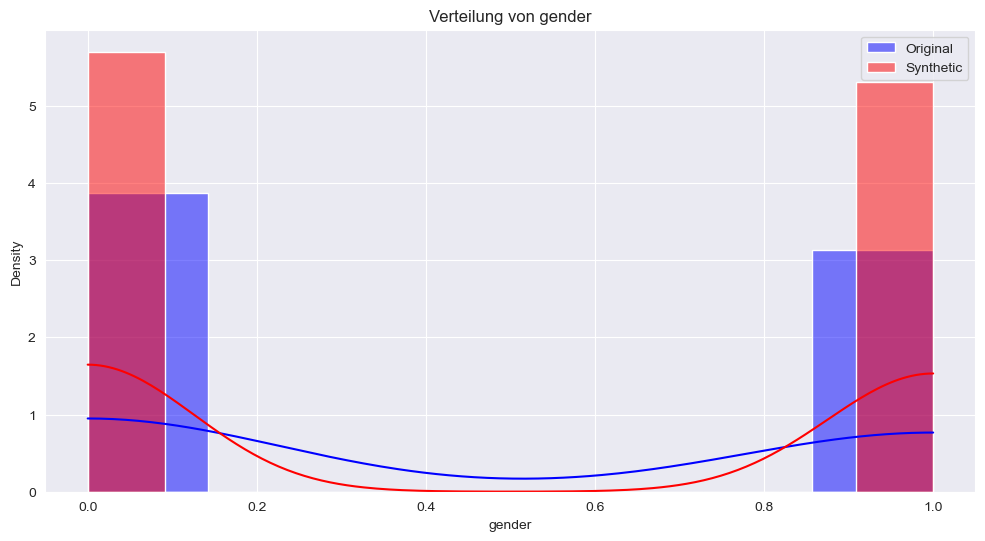

Normalitätstest für gender:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für gender:
Statistik = 0.22250406634057027, p-Wert = 0.6371385335798627
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



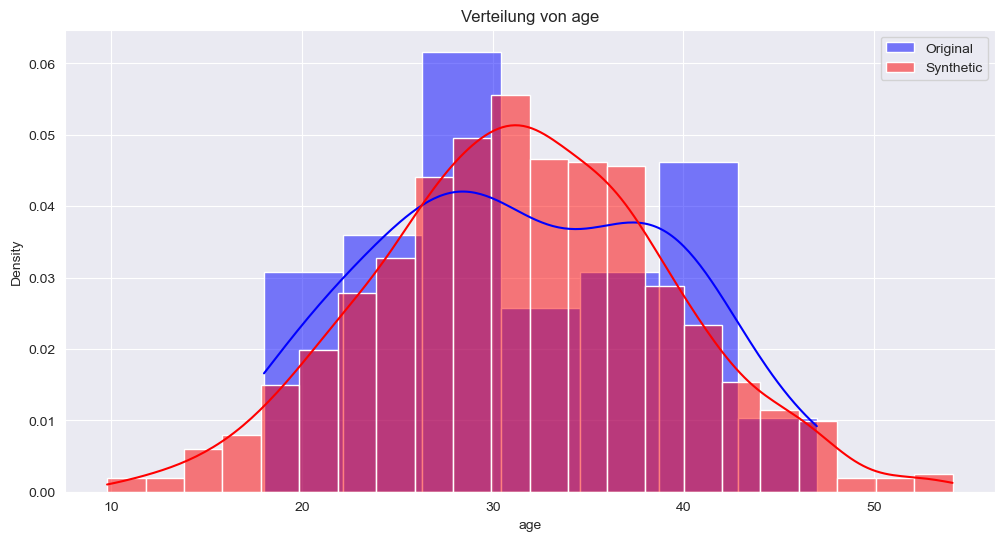

Normalitätstest für age:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für age:
Statistik = -0.048572781454777114, p-Wert = 0.9614518539636521
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



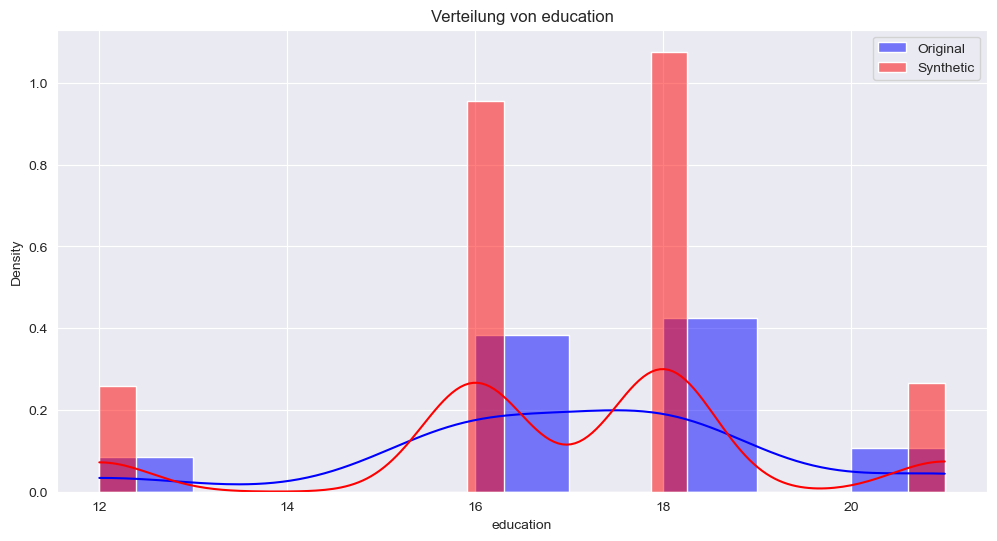

Normalitätstest für education:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für education:
Statistik = 0.03159038774264254, p-Wert = 0.8589296441024379
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



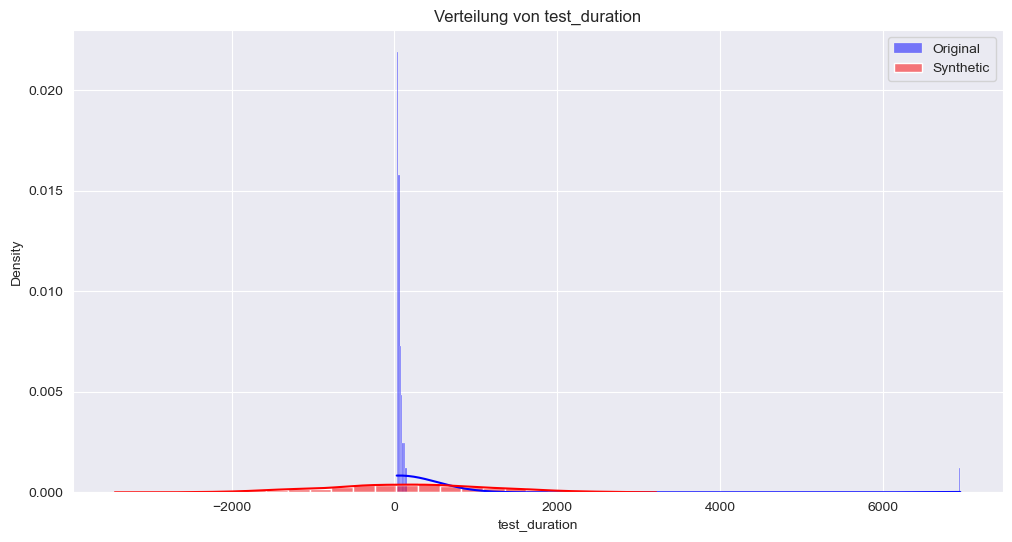

Normalitätstest für test_duration:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für test_duration:
Statistik = 0.34499756555307765, p-Wert = 0.5569586393319552
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



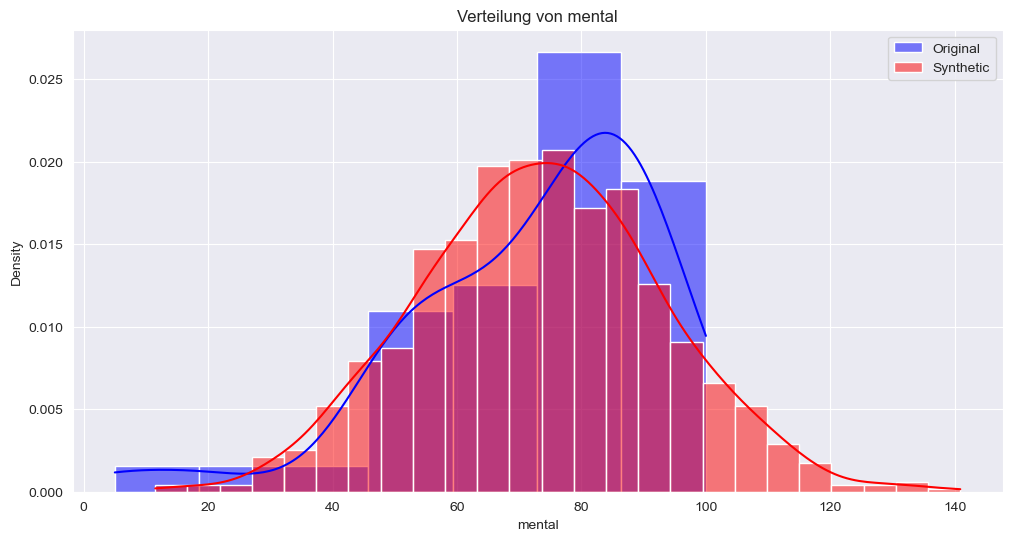

Normalitätstest für mental:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mental:
Statistik = 0.13997842275507966, p-Wert = 0.708302463930743
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



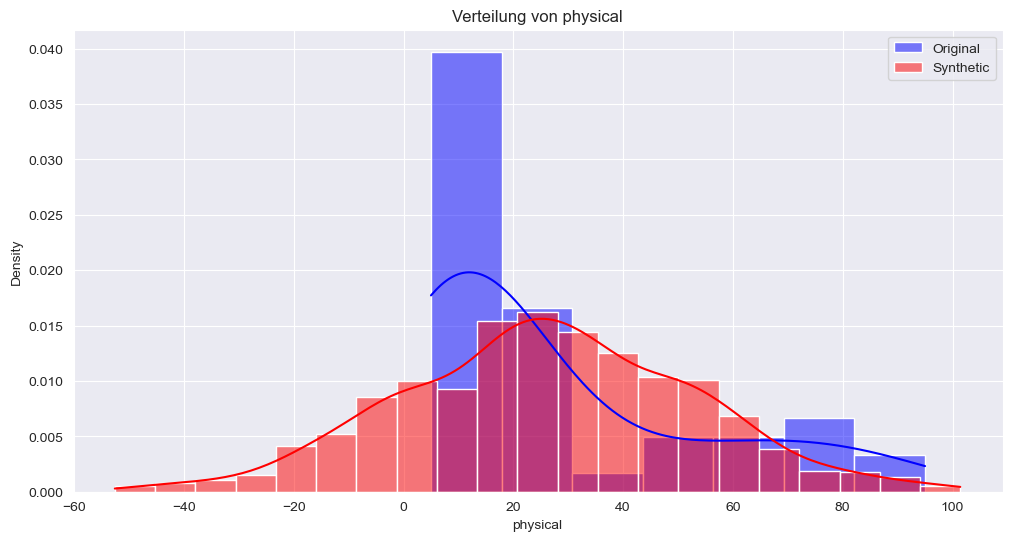

Normalitätstest für physical:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für physical:
Statistik = 0.408566374513619, p-Wert = 0.5226980553056845
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



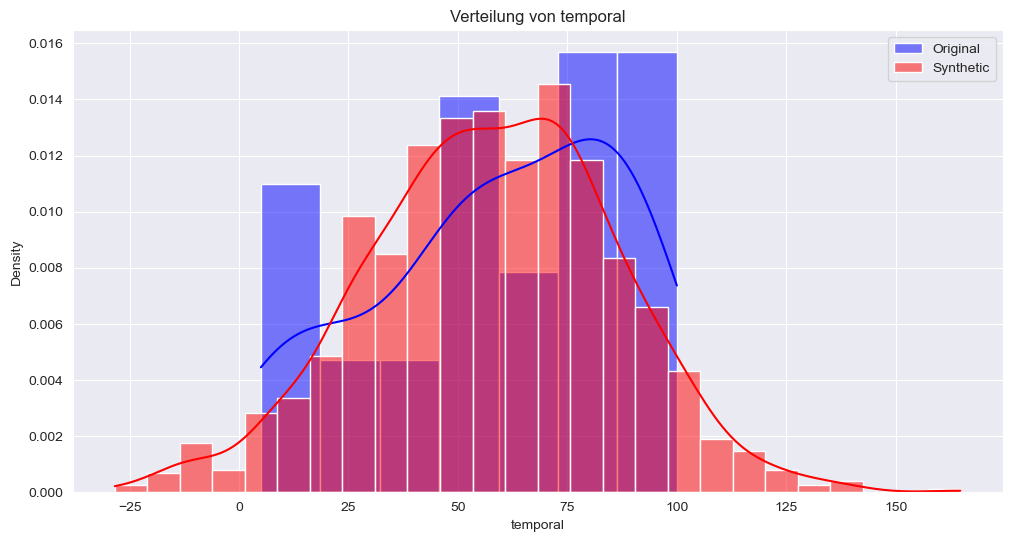

Normalitätstest für temporal:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für temporal:
Statistik = 0.48160720069079294, p-Wert = 0.4876952212890542
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



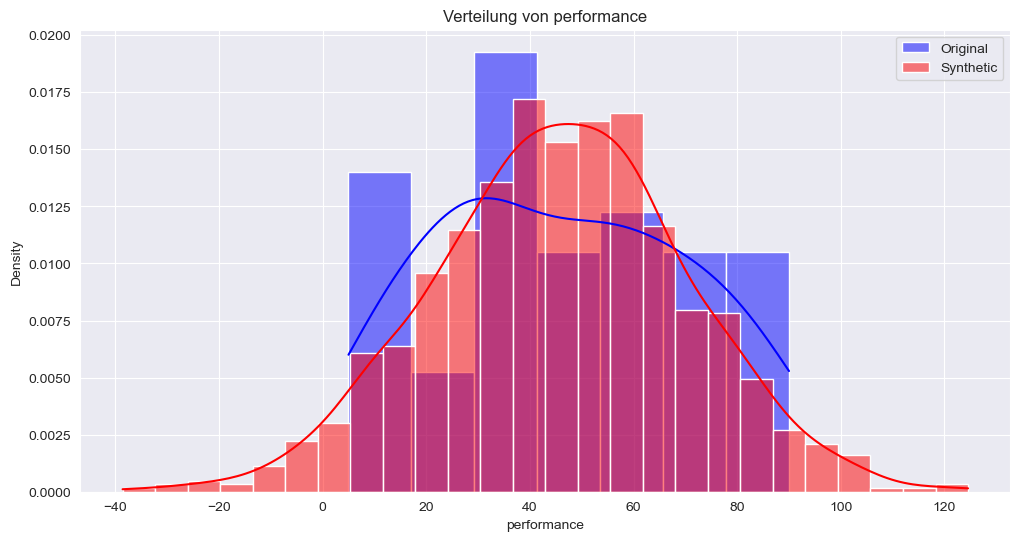

Normalitätstest für performance:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für performance:
Statistik = 0.049359044598829345, p-Wert = 0.9608285347591573
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



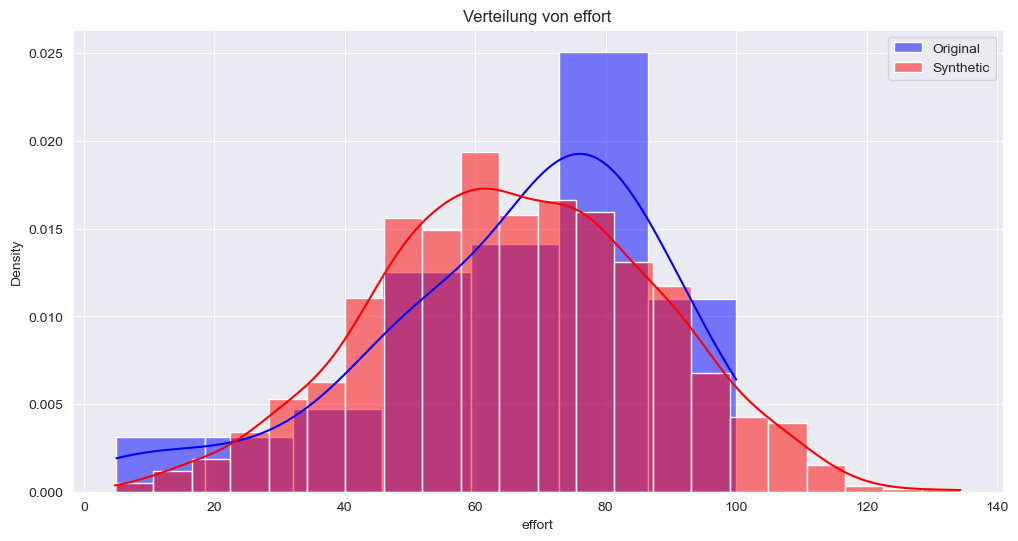

Normalitätstest für effort:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für effort:
Statistik = 0.3898553569011772, p-Wert = 0.5323754420805493
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



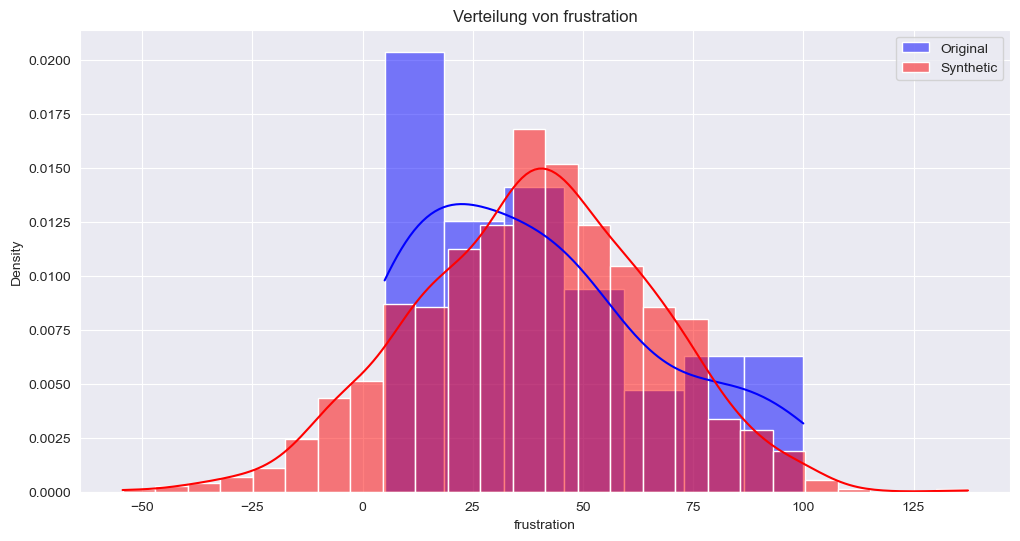

Normalitätstest für frustration:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für frustration:
Statistik = 0.1467053194148791, p-Wert = 0.7017039680120569
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



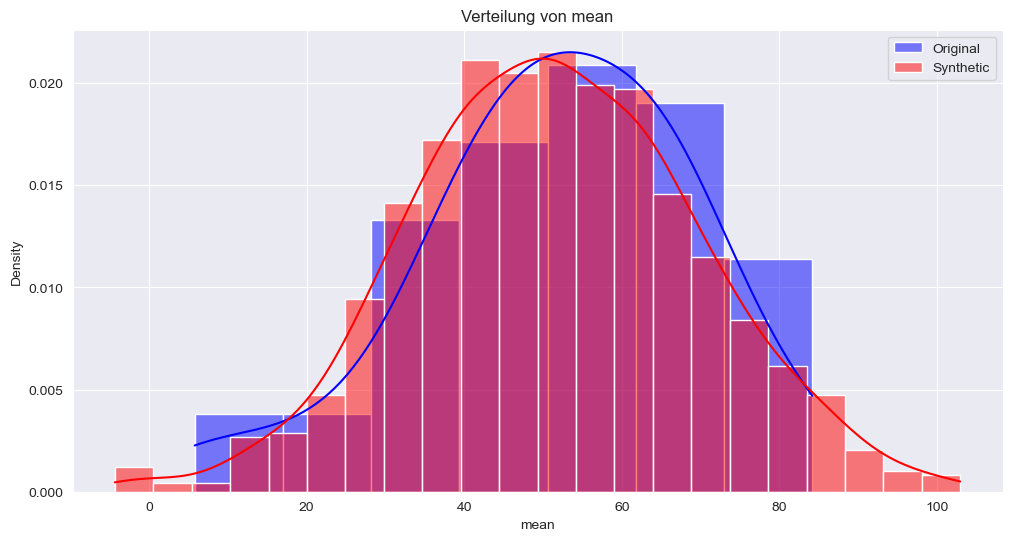

Normalitätstest für mean:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für mean:
Statistik = 0.15989944622195992, p-Wert = 0.8735946094302797
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



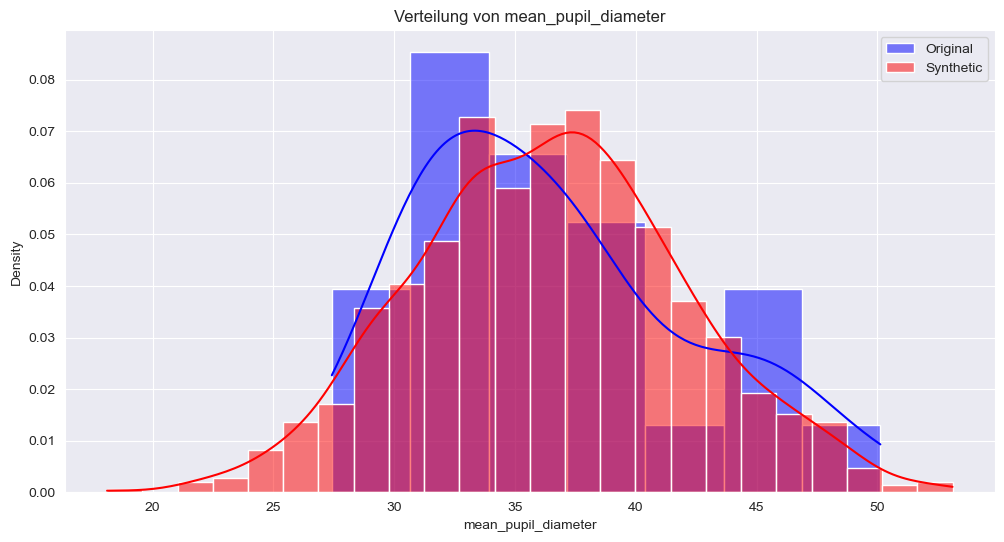

Normalitätstest für mean_pupil_diameter:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mean_pupil_diameter:
Statistik = 0.24803012960606766, p-Wert = 0.6184655518011318
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



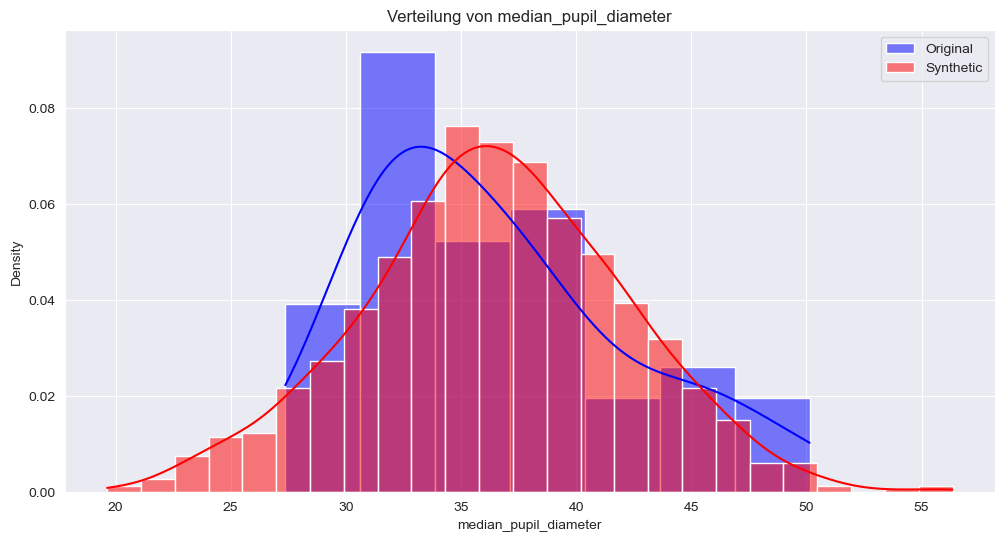

Normalitätstest für median_pupil_diameter:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für median_pupil_diameter:
Statistik = 0.5030783687172142, p-Wert = 0.47815062761146365
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



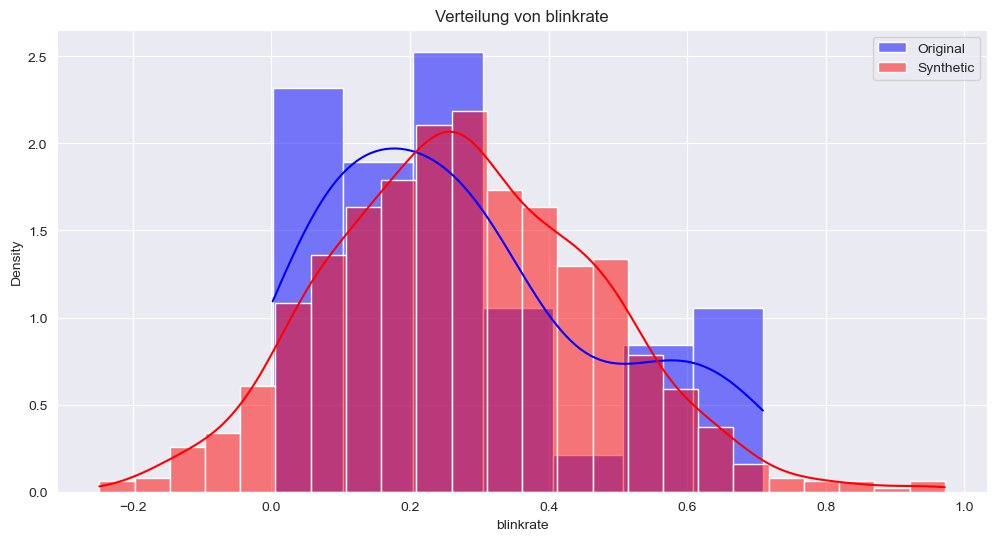

Normalitätstest für blinkrate:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für blinkrate:
Statistik = 0.38923891709084074, p-Wert = 0.5326997306897072
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



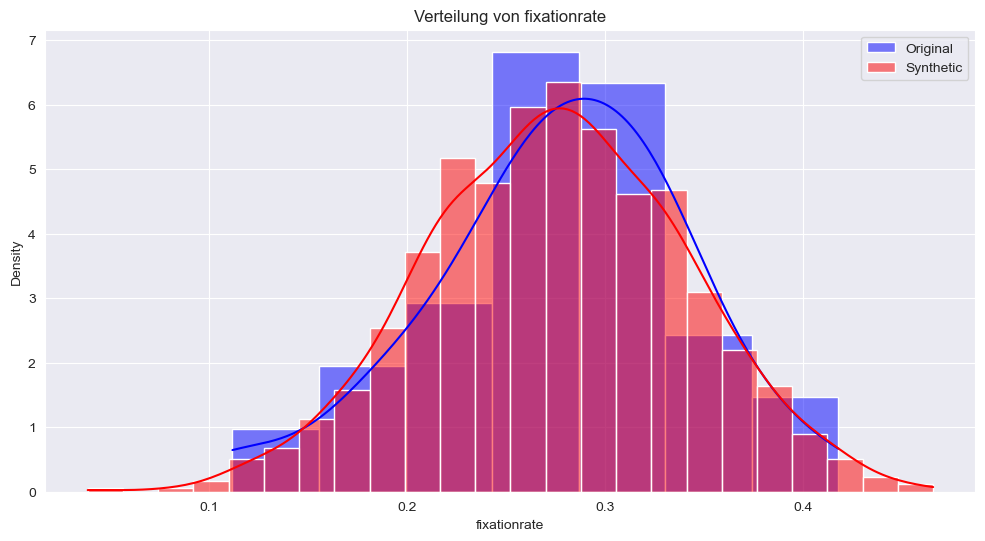

Normalitätstest für fixationrate:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für fixationrate:
Statistik = 0.20221326586845365, p-Wert = 0.8405626153944343
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



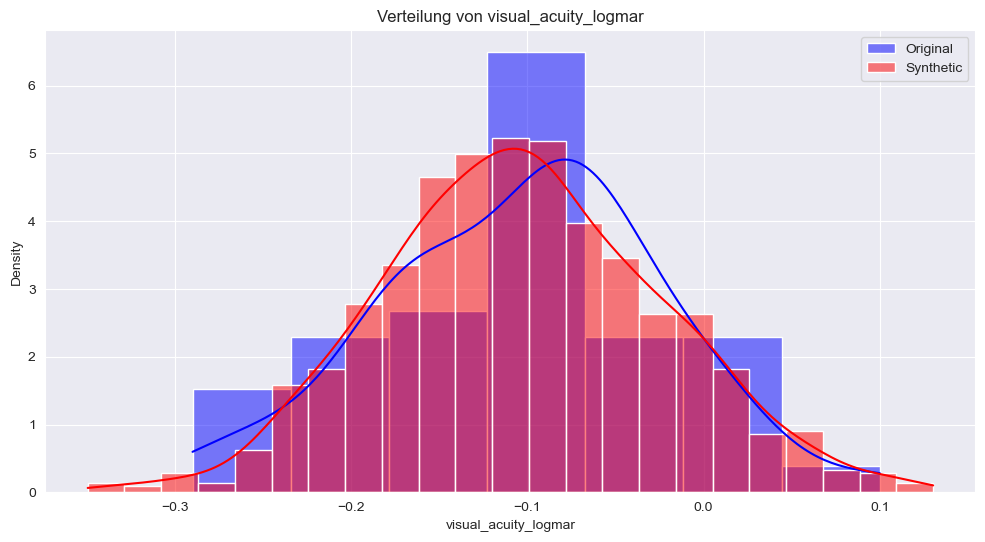

Normalitätstest für visual_acuity_logmar:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für visual_acuity_logmar:
Statistik = 0.03414036161253438, p-Wert = 0.9729001084781925
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



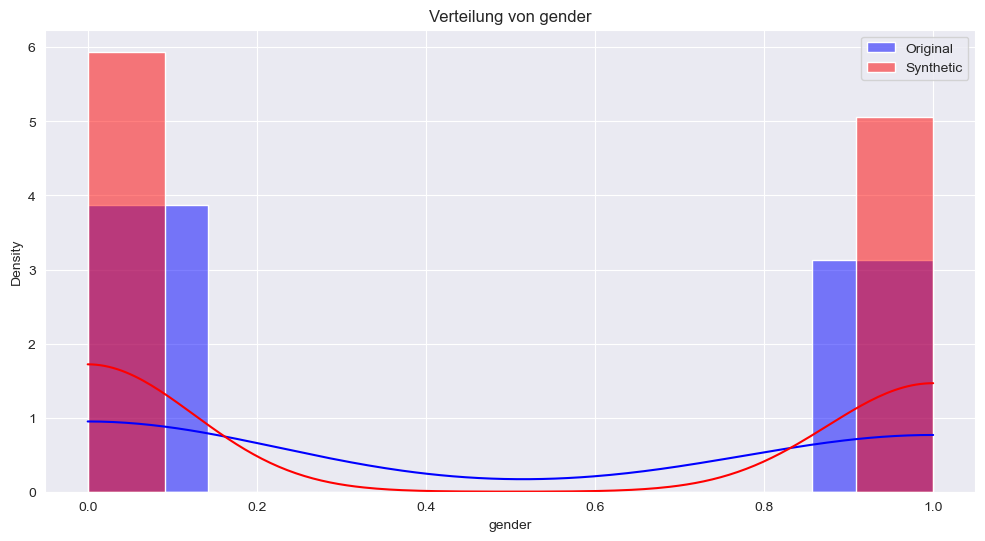

Normalitätstest für gender:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für gender:
Statistik = 0.03142358264562691, p-Wert = 0.8592986851650586
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



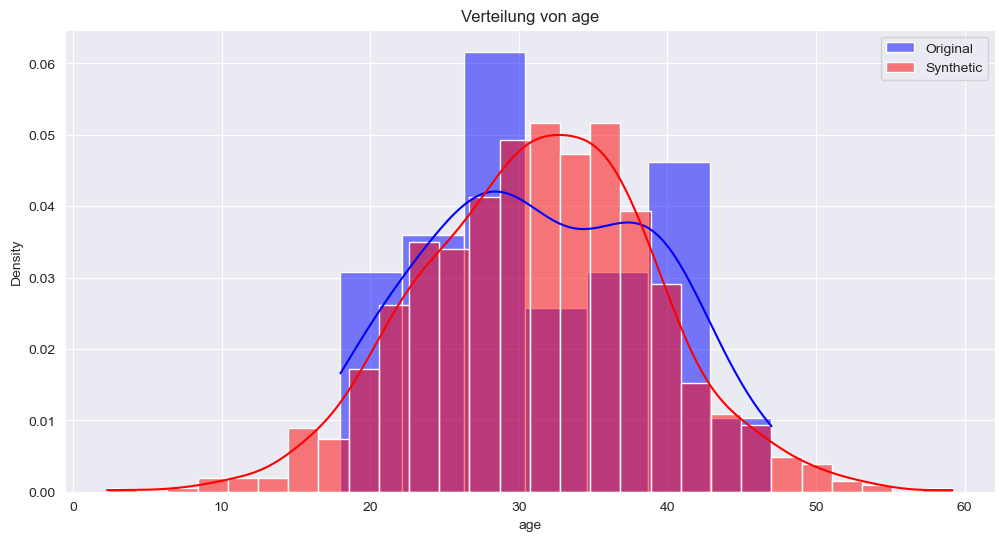

Normalitätstest für age:
Originaldaten: Normalverteilt
Generierte Daten: Normalverteilt
t-Test für age:
Statistik = 0.13559160503021656, p-Wert = 0.8926826178908923
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



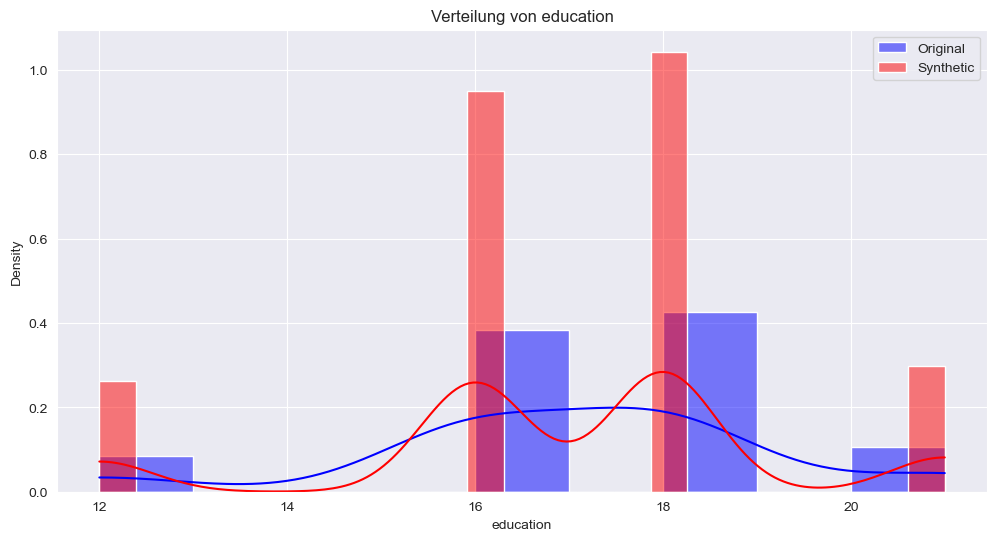

Normalitätstest für education:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für education:
Statistik = 0.01061303339211903, p-Wert = 0.9179474328562357
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



In [35]:
test_1_df = data[data['test_id'] == 1]
test_2_df = data[data['test_id'] == 2]
test_3_df = data[data['test_id'] == 3]
test_4_df = data[data['test_id'] == 4]

# Generate synthetic data for each test
synth_data_1 = scale_data(test_1_df)
synth_data_2 = scale_data(test_2_df)
synth_data_3 = scale_data(test_3_df)
synth_data_4 = scale_data(test_4_df)

# check data of each test
Util.data_check.compare_distributions(test_1_df, synth_data_1)
Util.data_check.compare_distributions(test_2_df, synth_data_2)
Util.data_check.compare_distributions(test_3_df, synth_data_3)
Util.data_check.compare_distributions(test_4_df, synth_data_4)




In [36]:

# Combine synthetic data with original data
augmented_data = pd.concat([data, synth_data_1], ignore_index=True)
augmented_data = pd.concat([augmented_data, synth_data_2], ignore_index=True)
augmented_data = pd.concat([augmented_data, synth_data_3], ignore_index=True)
augmented_data = pd.concat([augmented_data, synth_data_4], ignore_index=True)


# Output shapes
print("Original Data Shape:", data.shape)
print("Synthetic Data Shape:", augmented_data.shape)
print("Augmented Data Shape:", augmented_data.shape)

Original Data Shape: (188, 18)
Synthetic Data Shape: (4188, 18)
Augmented Data Shape: (4188, 18)


In [38]:
# Ausgabe der ersten 5 Zeilen
print(augmented_data[:16])

    participant_id  test_id  test_duration  mental  physical  temporal  \
0              1.0      1.0      33.643950    10.0       5.0      15.0   
1              1.0      2.0      28.484322    50.0      30.0      25.0   
2              1.0      3.0      71.423823   100.0      10.0      75.0   
3              1.0      4.0      38.163442    60.0      15.0      45.0   
4              2.0      1.0      41.748047    20.0      10.0      20.0   
5              2.0      2.0      29.480232    50.0      10.0      60.0   
6              2.0      3.0      42.027676    50.0      10.0      20.0   
7              2.0      4.0      49.023876    85.0      10.0      90.0   
8              3.0      1.0      42.350301     5.0       5.0       5.0   
9              3.0      2.0      45.063506    15.0      10.0      10.0   
10             3.0      3.0      86.713078    80.0      15.0      55.0   
11             3.0      4.0      53.124019    55.0      10.0      15.0   
12             4.0      1.0      18.11

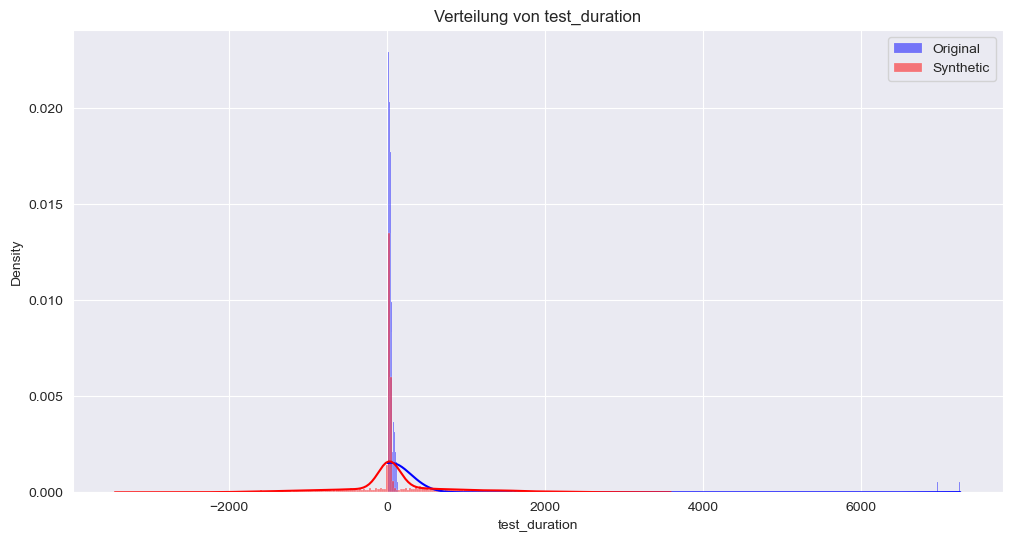

Normalitätstest für test_duration:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für test_duration:
Statistik = 7.820964944930569, p-Wert = 0.005164361551688716
Die Verteilungen sind signifikant unterschiedlich (Nullhypothese verworfen).



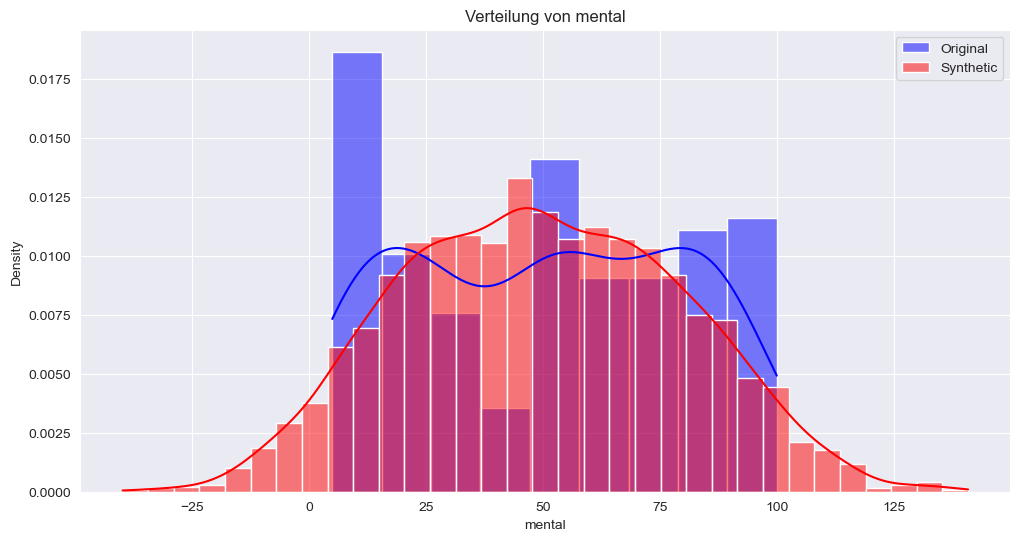

Normalitätstest für mental:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für mental:
Statistik = 0.08325617471899906, p-Wert = 0.7729322980583113
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



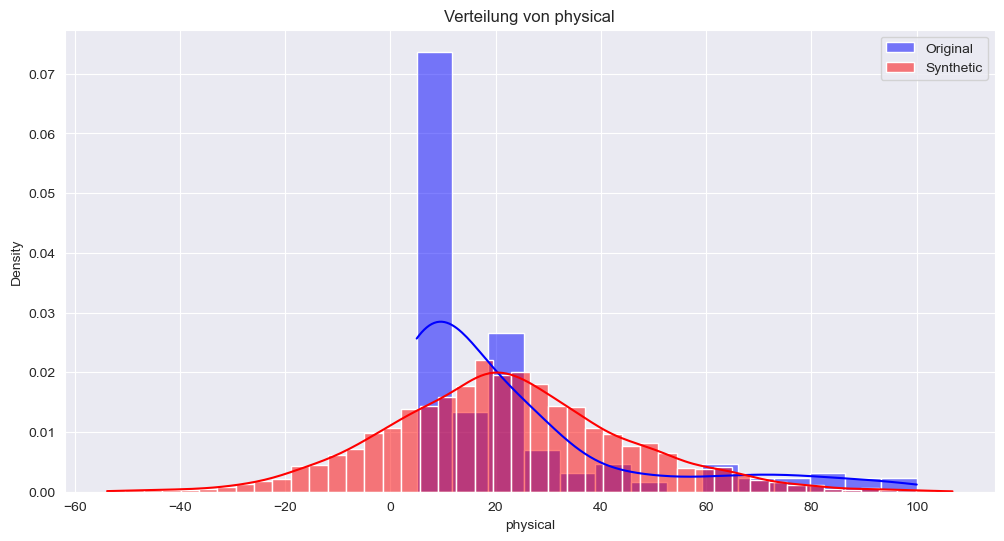

Normalitätstest für physical:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für physical:
Statistik = 3.7549407368857484, p-Wert = 0.052651662149767985
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



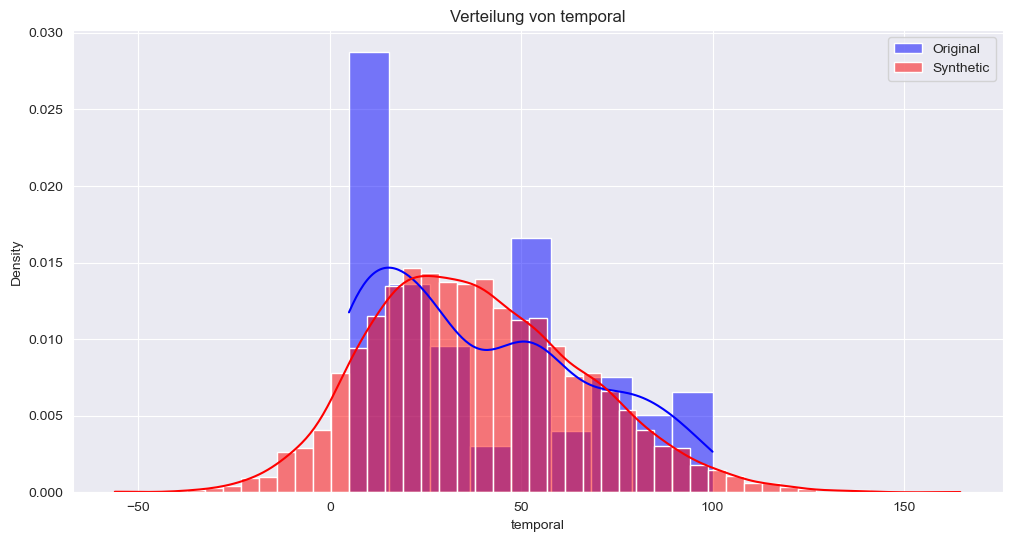

Normalitätstest für temporal:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für temporal:
Statistik = 0.06971639230923463, p-Wert = 0.7917501607144709
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



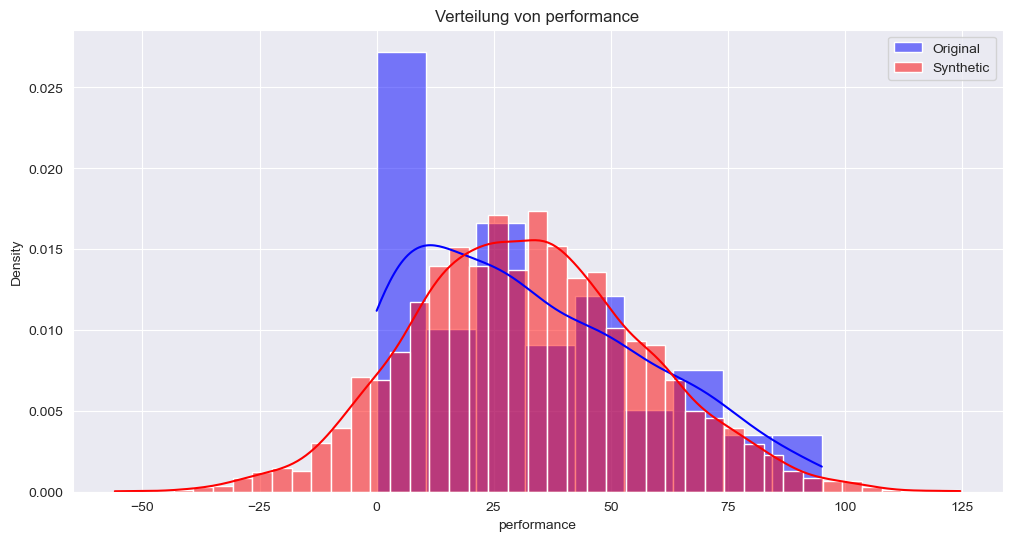

Normalitätstest für performance:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für performance:
Statistik = 0.4499378549340574, p-Wert = 0.5023644675363788
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



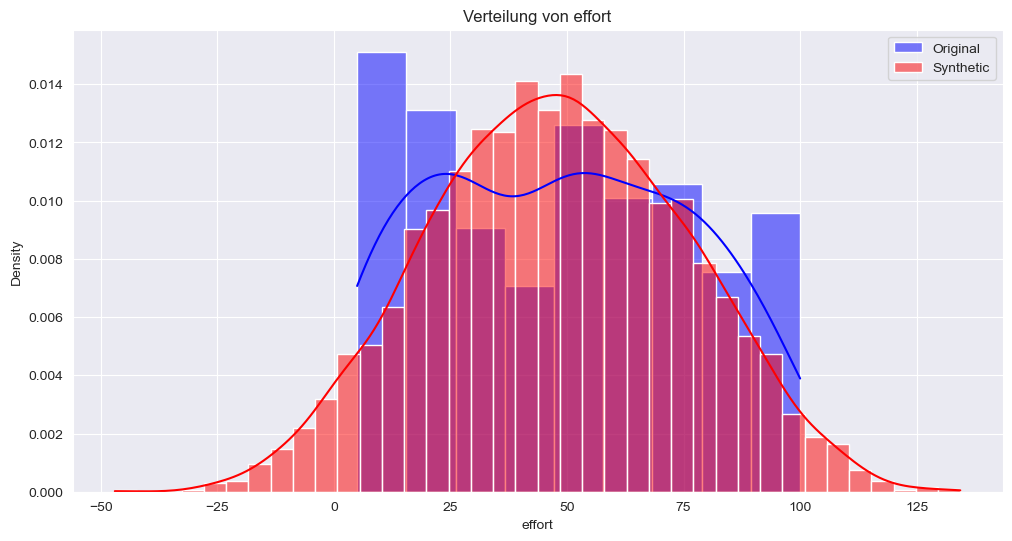

Normalitätstest für effort:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für effort:
Statistik = 0.000940948748934607, p-Wert = 0.9755288182720245
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



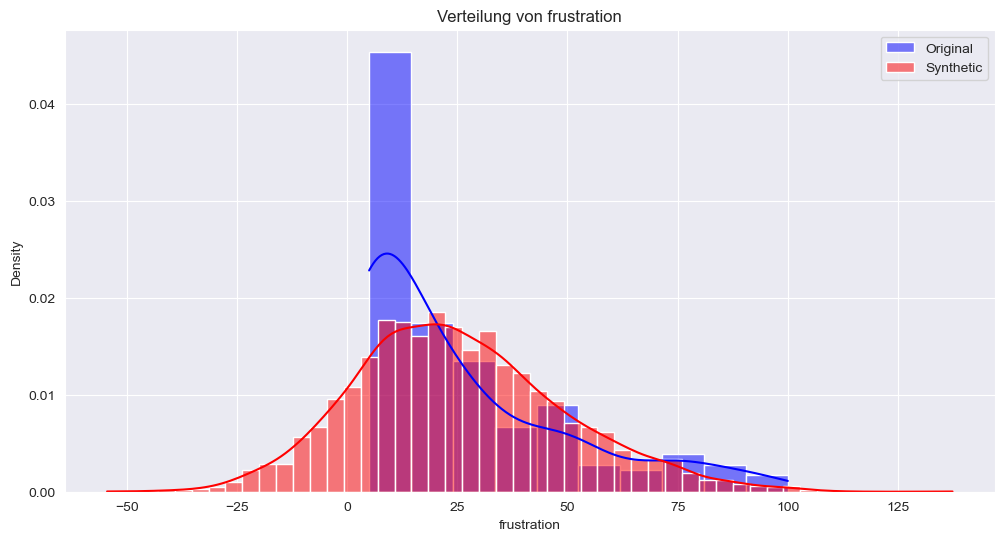

Normalitätstest für frustration:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für frustration:
Statistik = 2.615510719529022, p-Wert = 0.10582344970041399
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



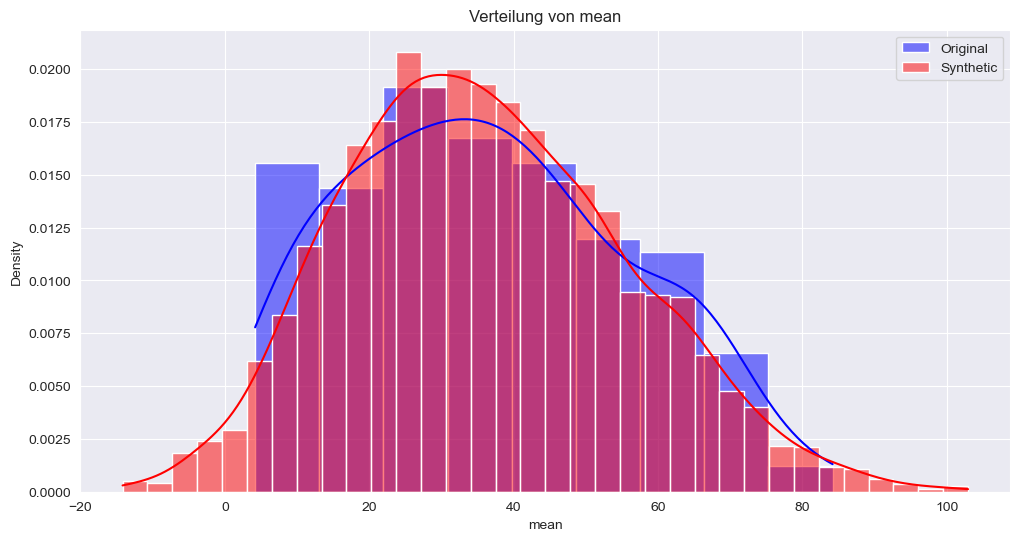

Normalitätstest für mean:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für mean:
Statistik = 0.00018270115234813463, p-Wert = 0.9892155629295529
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



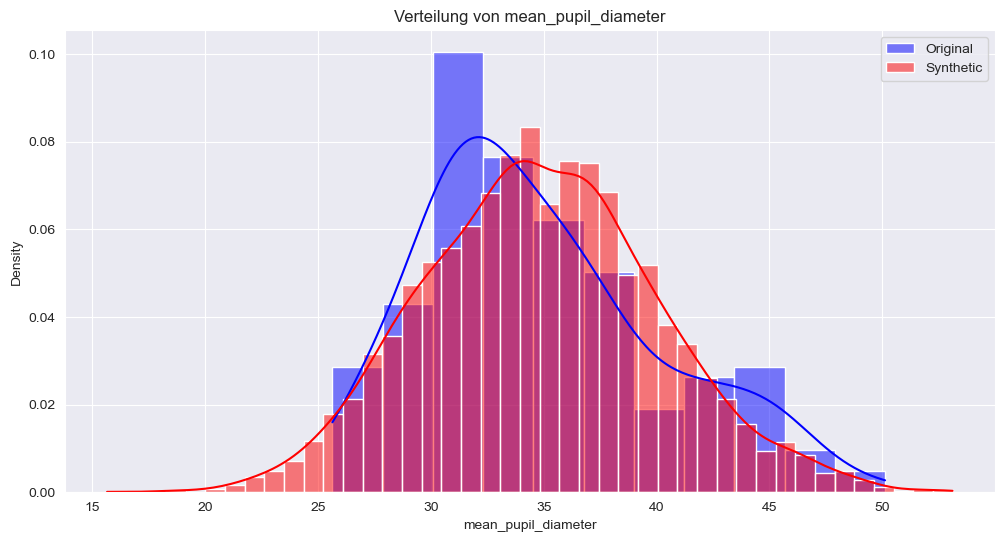

Normalitätstest für mean_pupil_diameter:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für mean_pupil_diameter:
Statistik = 0.8694948170035439, p-Wert = 0.3510952026040344
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



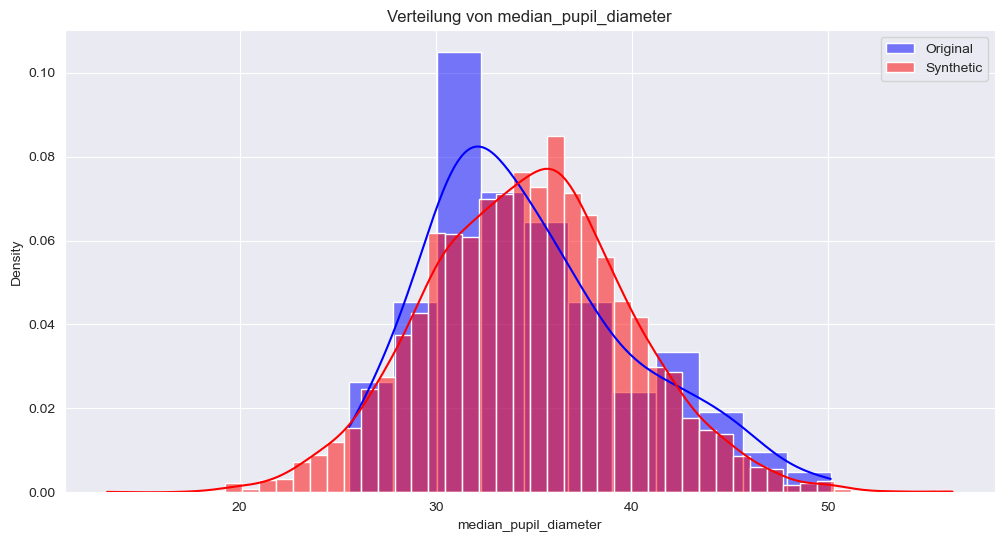

Normalitätstest für median_pupil_diameter:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für median_pupil_diameter:
Statistik = 0.6703984957719854, p-Wert = 0.41291270778244205
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



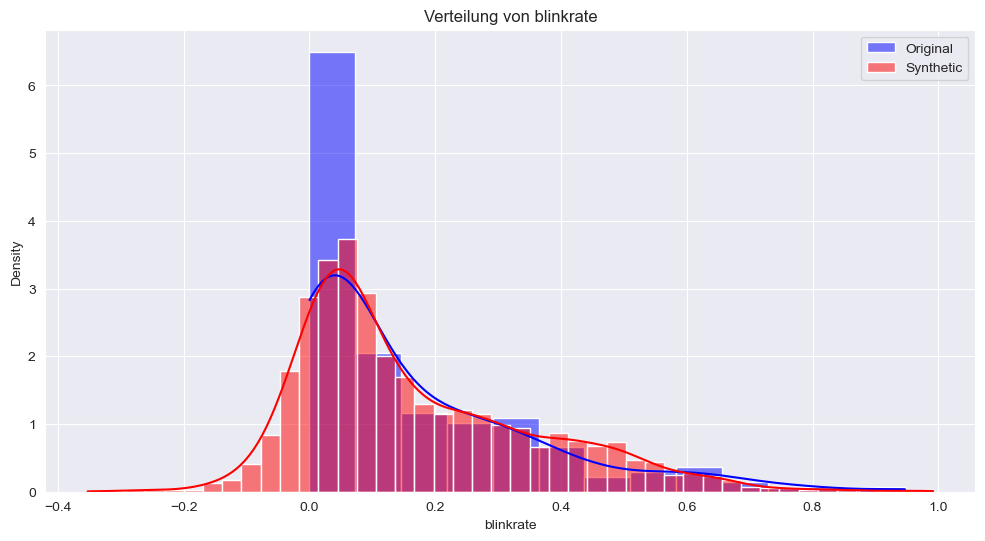

Normalitätstest für blinkrate:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für blinkrate:
Statistik = 0.9075418547717563, p-Wert = 0.34076747931075635
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



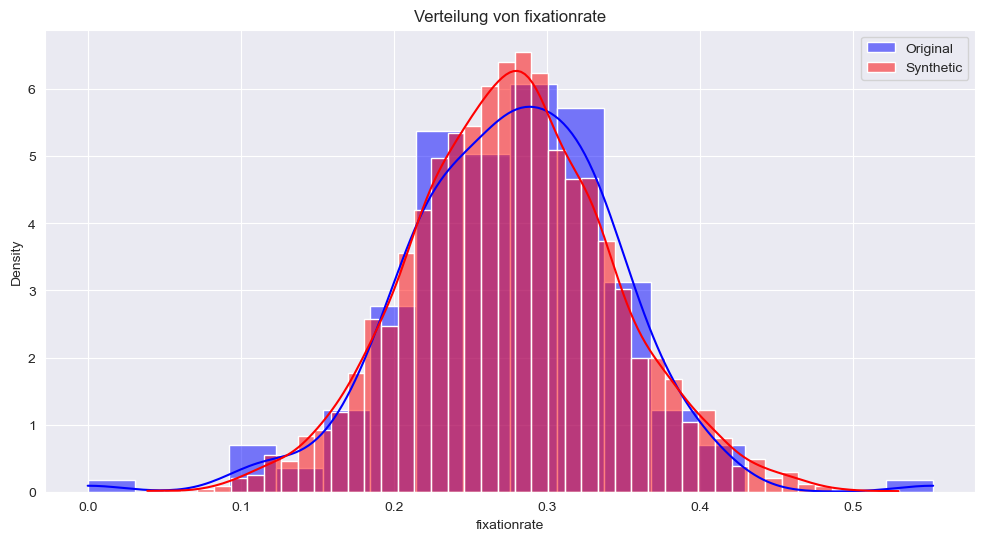

Normalitätstest für fixationrate:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für fixationrate:
Statistik = 0.10272820282344093, p-Wert = 0.7485799268821013
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



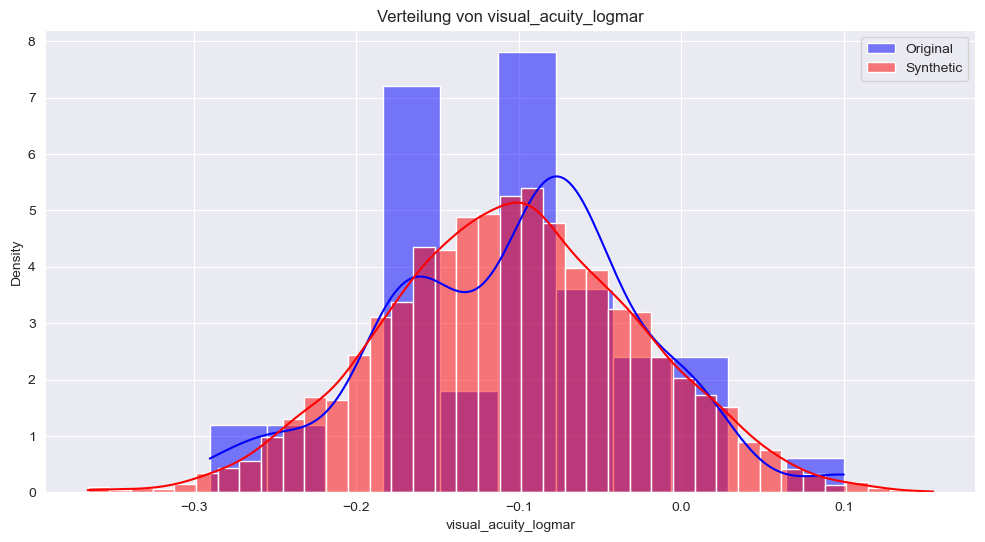

Normalitätstest für visual_acuity_logmar:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für visual_acuity_logmar:
Statistik = 0.3074631647891163, p-Wert = 0.5792410768426821
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



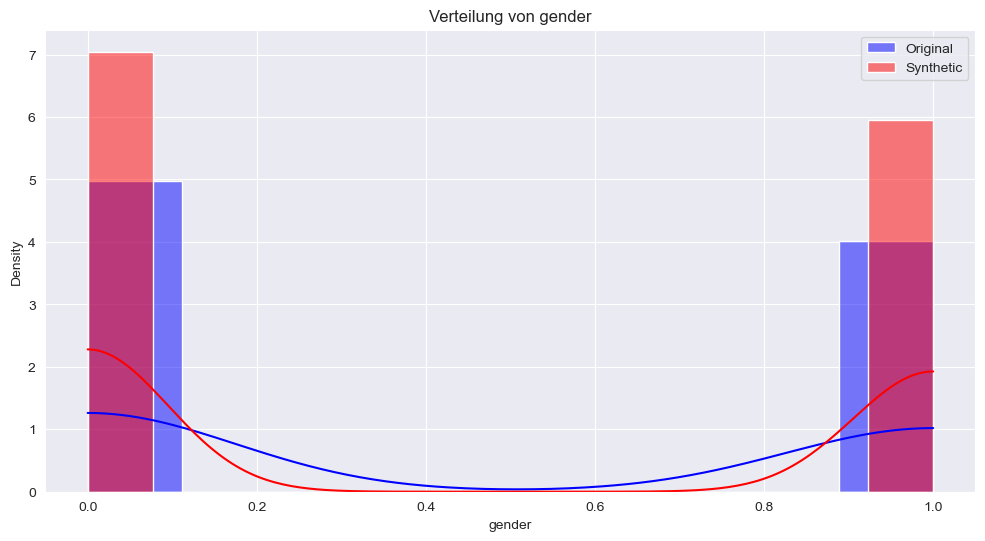

Normalitätstest für gender:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für gender:
Statistik = 0.0905926037740973, p-Wert = 0.7634251301943528
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



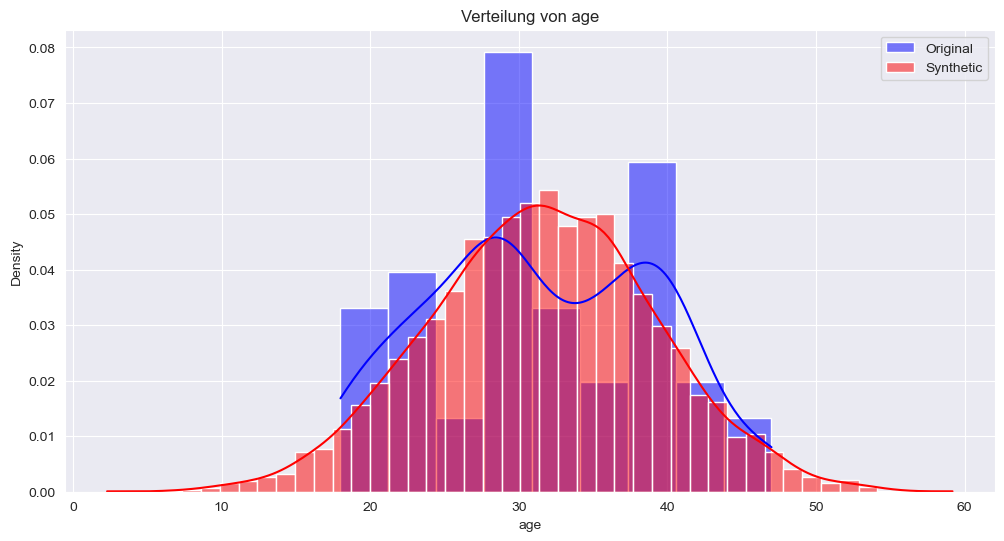

Normalitätstest für age:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für age:
Statistik = 0.03492729489307004, p-Wert = 0.8517480907055424
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



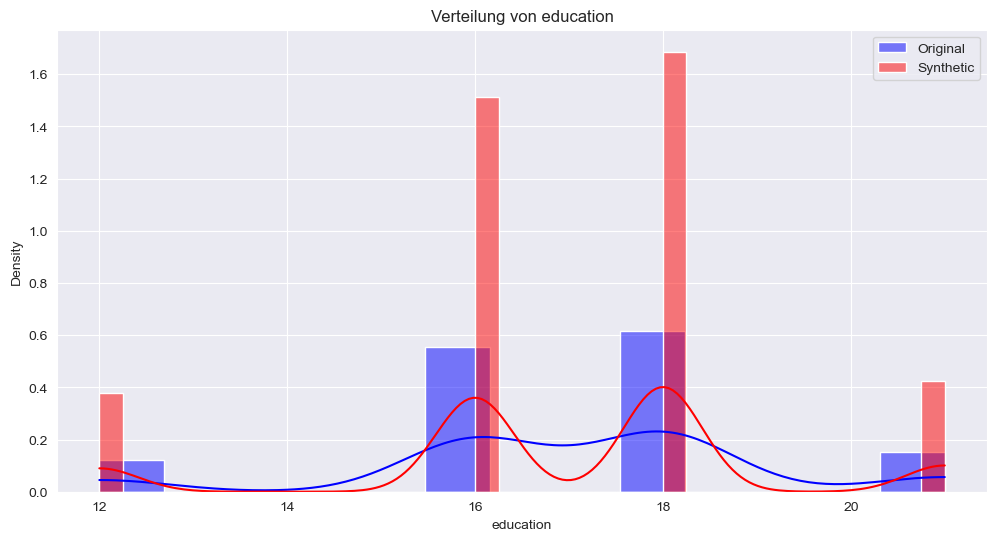

Normalitätstest für education:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für education:
Statistik = 0.04362221444714743, p-Wert = 0.8345580637534121
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



In [39]:

# Getrennte DataFrames für Original- und generierte Daten
original_df = data.copy()
synthetic_df = augmented_data.iloc[len(data):].copy()

# Werte prüfen. Ausgabe als Plot und Text
Util.data_check.compare_distributions(original_df, synthetic_df)

In [70]:
# Merge original and synthetic data, then save to disk
# We want to count up the participant_id

max_participant_id = max(data['participant_id'].values)
print(f"We'll continue from participant_id {max_participant_id} onwards.")

We'll continue from participant_id 47 onwards.


In [71]:
# print values of participant_id in augmented data
print(augmented_data['participant_id'])

0        1.000000
1        1.000000
2        1.000000
3        1.000000
4        2.000000
          ...    
1183    25.799822
1184     6.918084
1185    12.394990
1186    17.024924
1187    14.590243
Name: participant_id, Length: 1188, dtype: float64


In [40]:
num_synth_participants = augmented_data.shape[0] // 4
new_participant_ids = np.arange(max_participant_id + 1, max_participant_id + 1 + num_synth_participants)

print(f"Number of new participants: {num_synth_participants}")

NameError: name 'max_participant_id' is not defined